In [1]:
from Funcs.Utility import *

In [19]:
# PATH_LOC = '/home/panyu/Documents/DataSet/D#4(Year2022)/data'
# PATH_NEW_LOC = '/home/panyu/Documents/DataSet/newdata'
# name= 'Location'
# paths = [
#     (d, os.path.join(PATH_LOC, d, f'{name}.csv'))
#     for d in os.listdir(PATH_LOC)
#     if d.startswith('P')
# ]

In [20]:
# for pcode, p in paths:
#     if os.path.exists(p):
#         temp = pd.read_csv(p)
#         new_p = os.path.join(PATH_NEW_LOC, f'{pcode}')
#         if not os.path.exists(new_p):
#             os.mkdir(new_p)
#         temp.to_csv(os.path.join (new_p, f'{name}.csv'),index=False)

# StudentLife

In [91]:
import os
import json
import pandas as pd

# Path to the directory containing JSON files
directory = '/var/nfs_share/StudentLife/dataset/EMA/response/Stress'

# List of all 'Stress_uxx.json' files in the directory
stress_files = [f for f in os.listdir(directory) if f.startswith('Stress_') and f.endswith('.json')]

# Initialize a list to store record counts per day for each file
all_recs_per_day = []

# Dictionary to store the unique days count per user
user_days_count = {}

# Loop over each file
for file in stress_files:
    # Extract user ID from filename
    user_id = file.split('.')[0].split('_')[1]
    file_path = os.path.join(directory, file)
    with open(file_path) as f:
        data = json.load(f)

    # Convert to DataFrame
    df = pd.json_normalize(data)
    # df = df[df.level.notnull()].drop(['null'], axis=1)
    df = df.assign(timestamp=lambda x: pd.to_datetime(x['resp_time'], unit='s', utc=False))
    df['date'] = df['timestamp'].dt.date

    # Get record counts per day for the current file
    recs_per_day = df.groupby('date').size()
    all_recs_per_day.extend(recs_per_day)

    # Count unique days for this user
    unique_days = df['date'].nunique()

    # Update the count in the dictionary
    user_days_count[user_id] = unique_days

# Calculate the mean count of responses per day across all files
avg_per_day = pd.Series(all_recs_per_day).mean()
avg_days_per_user = pd.Series(list(user_days_count.values())).mean()

print(f"Average count of responses per day: {avg_per_day}")
print(f"Average count of days per users: {avg_days_per_user}")

Average count of responses per day: 1.8637770897832817
Average count of days per users: 26.367346938775512


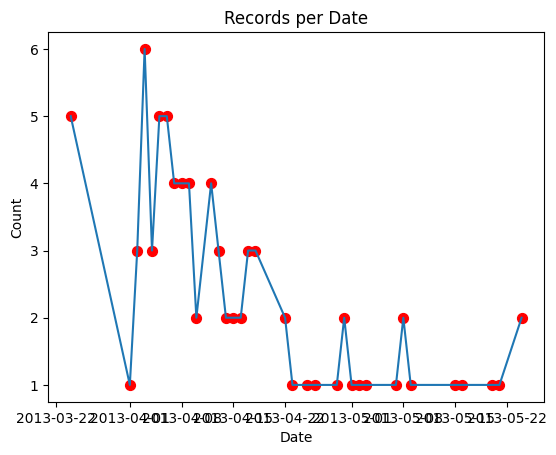

In [93]:
import matplotlib.pyplot as plt

# Create line plot
ax = df.date.value_counts().plot(kind='line')

# Add scatter plot
ax.scatter(x=df.date.value_counts().index, 
           y=df.date.value_counts().values,
           color='red',
           s=50)

# Set titles and labels  
ax.set_xlabel('Date')
ax.set_ylabel('Count')
ax.set_title('Records per Date')

# Show plot
plt.show()

## Label Data

In [2]:
LABELS_PROC = pd.read_csv(os.path.join(PATH_INTERMEDIATE, 'proc', 'LABELS_PROC.csv'), index_col=['pcode','timestamp'],parse_dates=True)

In [3]:
_df =LABELS_PROC
_df.reset_index(level='timestamp', inplace=True)
print('First timestamp:', _df['timestamp'].min())
print('Last timestamp:', _df['timestamp'].max())

First timestamp: 2019-04-30 10:03:28+09:00
Last timestamp: 2019-05-22 22:02:03+09:00


In [4]:
time_ranges = _df.groupby('pcode')['timestamp'].agg(['min', 'max'])
print(time_ranges)

                            min                       max
pcode                                                    
P01   2019-05-08 10:29:46+09:00 2019-05-14 21:12:31+09:00
P02   2019-05-08 10:52:29+09:00 2019-05-14 21:13:14+09:00
P03   2019-05-08 11:13:13+09:00 2019-05-14 20:23:23+09:00
P05   2019-05-08 10:40:49+09:00 2019-05-14 21:59:16+09:00
P06   2019-05-08 10:32:09+09:00 2019-05-14 21:56:51+09:00
P08   2019-05-08 10:42:48+09:00 2019-05-14 21:12:32+09:00
P09   2019-05-08 13:44:51+09:00 2019-05-14 20:31:01+09:00
P10   2019-05-08 10:40:26+09:00 2019-05-14 15:13:12+09:00
P12   2019-05-09 14:18:30+09:00 2019-05-14 21:09:22+09:00
P13   2019-05-08 10:30:38+09:00 2019-05-14 21:51:35+09:00
P15   2019-05-08 12:09:34+09:00 2019-05-14 19:44:17+09:00
P19   2019-05-08 10:41:14+09:00 2019-05-14 22:01:12+09:00
P21   2019-05-08 15:49:36+09:00 2019-05-14 21:43:22+09:00
P23   2019-05-08 10:20:41+09:00 2019-05-14 18:13:07+09:00
P26   2019-05-08 10:11:53+09:00 2019-05-14 21:59:17+09:00
P28   2019-05-

In [5]:
def exclude_first_day(df):
    # Get the date of the first timestamp
    first_date = df['timestamp'].iloc[0].date()
    
    # Get the date of the second day
    second_date = first_date + pd.Timedelta(days=1)
    
    # Only keep rows where the date is on or after the second day
    df = df[df['timestamp'].dt.date >= second_date]
    
    return df

df = LABELS_PROC.reset_index()

# Apply the function to each group
filtered_df = df.groupby('pcode', group_keys=False).apply(exclude_first_day)


In [6]:
filtered_df.to_csv(os.path.join(PATH_INTERMEDIATE,'exclude_1st_day.csv'),index=True)

In [ ]:
pd.read_csv(os.path.join(PATH_INTERMEDIATE,'exclude_1st_day.csv'),index_col=0)

,pcode,timestamp,responseTime,scheduledTime,valence,arousal,attention,stress,duration,disturbance,change,valence_fixed,arousal_fixed,stress_fixed,disturbance_fixed,stress_fixed_tri,stress_user_mean
7,P01,2019-05-09 12:09:38+09:00,1557371378000,1.557371e+12,-3,2,2,2,5.0,2,0,0,1,1,1,1.0,1.0
8,P01,2019-05-09 14:24:26+09:00,1557379466000,1.557379e+12,2,3,3,-3,5.0,0,2,1,1,0,0,0.0,0.0
9,P01,2019-05-09 15:14:15+09:00,1557382455000,1.557382e+12,3,3,3,-3,10.0,-1,3,1,1,0,0,0.0,0.0
10,P01,2019-05-09 16:41:23+09:00,1557387683000,1.557388e+12,-3,-1,1,3,5.0,2,-1,0,0,1,1,1.0,1.0
11,P01,2019-05-09 21:12:50+09:00,1557403970000,1.557404e+12,-2,-2,-2,2,60.0,0,1,0,0,1,0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1772,P80,2019-05-05 21:57:28+09:00,1557061048000,1.557061e+12,1,-2,-3,-1,15.0,3,0,1,0,0,1,0.0,0.0
1773,P80,2019-05-06 15:09:04+09:00,1557122944000,1.557123e+12,1,-1,-2,-2,10.0,1,0,1,0,0,1,0.0,0.0
1774,P80,2019-05-06 15:55:56+09:00,1557125756000,1.557126e+12,1,2,3,1,15.0,3,-1,1,1,1,1,1.0,1.0
1775,P80,2019-05-06 19:43:21+09:00,1557139401000,1.557139e+12,0,1,-1,-1,10.0,2,0,0,1,0,1,0.0,0.0


In [ ]:
l ='stress'
p = os.path.join(PATH_INTERMEDIATE, 'feat',f'{l}.pkl')

X, y, groups, t, datetimes = load(p)


FileNotFoundError: [Errno 2] No such file or directory: '/var/nfs_share/Stress_Detection_D-1/Intermediate/feat/stress.pkl'

In [ ]:
groups

In [ ]:
X_filtered = X[X.index.isin(filtered_df.index)]
y_series = pd.Series(y, index=X.index)
y_filtered = y_series[y_series.index.isin(filtered_df.index)]
y_filtered = y_filtered.values
groups_series = pd.Series(groups, index=X.index)
groups_filtered = groups_series[groups_series.index.isin(filtered_df.index)]
groups_filtered = groups_filtered.values

## Personal Information (Similar user clustering)

In [ ]:
PARTICIPANTS = pd.read_csv(os.path.join(PATH_INTERMEDIATE, 'proc', 'PARTICIPANT_INFO.csv'),index_col = 'pcode')
PINFO = PARTICIPANTS.assign(
#     AGE=lambda x: x['age'],
#     GEN=lambda x: x['gender'],
    BFI_OPN=lambda x: x['openness'],
    BFI_CON=lambda x: x['conscientiousness'],
    BFI_NEU=lambda x: x['neuroticism'],
    BFI_EXT=lambda x: x['extraversion'],
    BFI_AGR=lambda x: x['agreeableness'],
#     PSS=lambda x: x['PSS10'],
#     PHQ=lambda x: x['PHQ9'],
#     GHQ=lambda x: x['GHQ12'],
)[[
#     'AGE', 'GEN', 'BFI_OPN', 'BFI_CON', 'BFI_NEU', 'BFI_EXT', 'BFI_AGR', 'PSS10', 'PHQ9', 'GHQ12'
        'BFI_OPN', 'BFI_CON', 'BFI_NEU', 'BFI_EXT', 'BFI_AGR'
]]
PINFO = pd.get_dummies(PINFO, prefix_sep='=', dtype=bool)

In [ ]:
list_pid = set(LABELS_PROC.index.get_level_values('pcode').values)

In [ ]:
PINFO_valid = PINFO.loc[PINFO.index.isin(list_pid)]

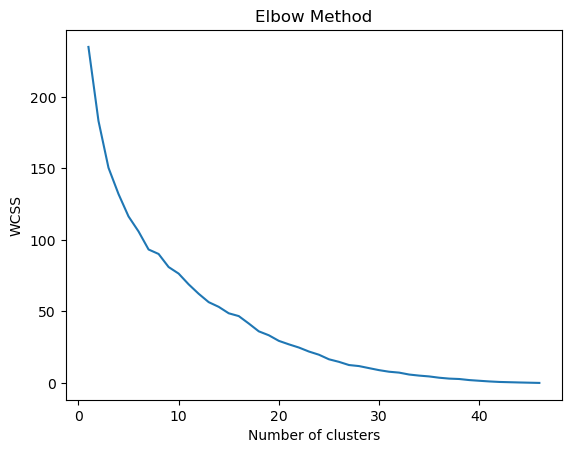

In [ ]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import pandas as pd
import matplotlib.pyplot as plt

df = PINFO_valid
# assuming df is your DataFrame and it only contains numerical columns
# standardize the data
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

# determine the optimal number of clusters
wcss = []
for i in range(1, 47):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(df_scaled)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 47), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [ ]:
optimal_clusters = 2

In [ ]:
# fit KMeans with the optimal number of clusters (replace 'optimal_clusters' with the number you chose)
kmeans = KMeans(n_clusters=optimal_clusters, init='k-means++', max_iter=300, n_init=10, random_state=0)
pred_y = kmeans.fit_predict(df_scaled)

# add the cluster labels to your original DataFrame
df['cluster'] = pred_y

/tmp/ipykernel_348099/1991565904.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['cluster'] = pred_y


In [ ]:
df['cluster'].value_counts()

1    33
0    14
Name: cluster, dtype: int64

In [ ]:
# Drop 'GEN=M' column
df = df.drop('GEN=M', axis=1)

# Encode 'GEN=F' column
df['GEN=F'] = df['GEN=F'].map({False: 0, True: 1})

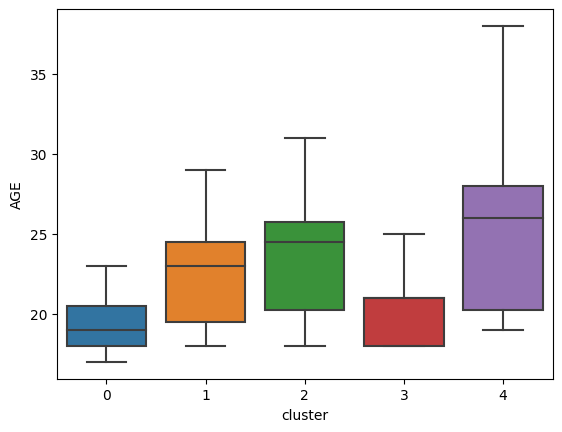

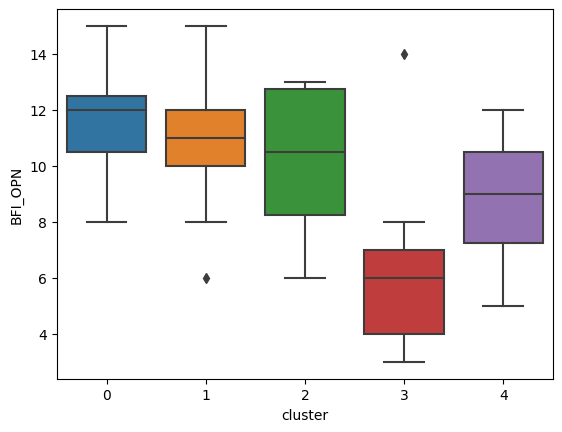

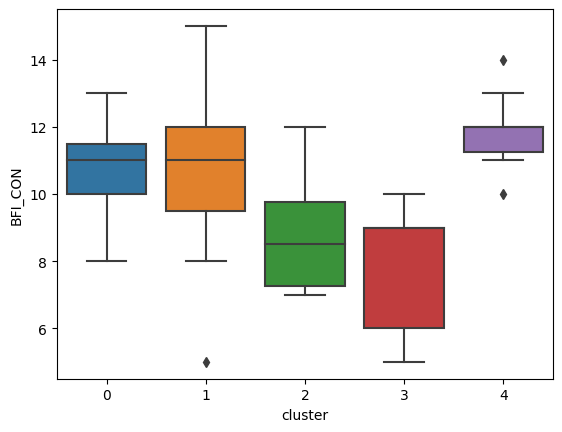

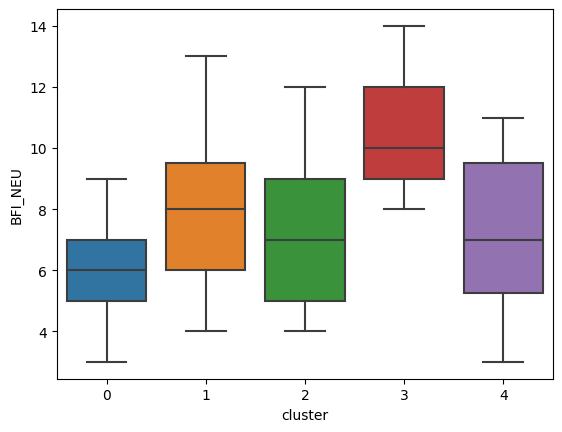

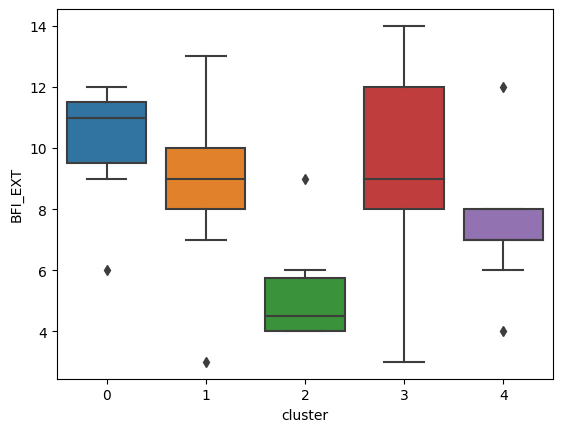

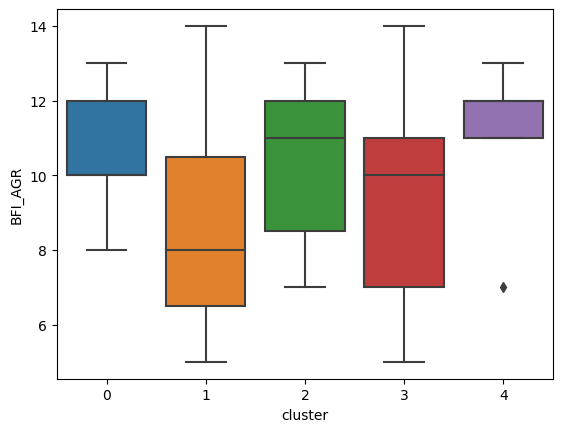

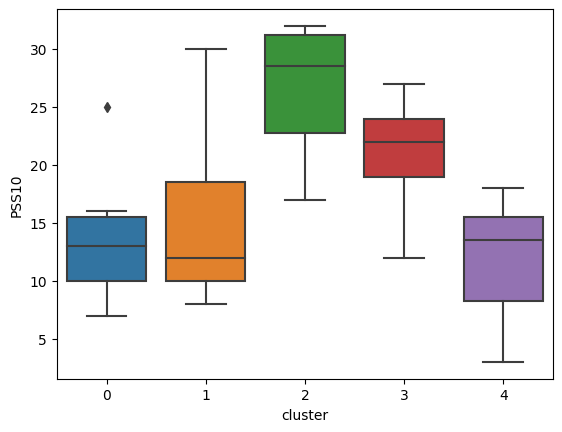

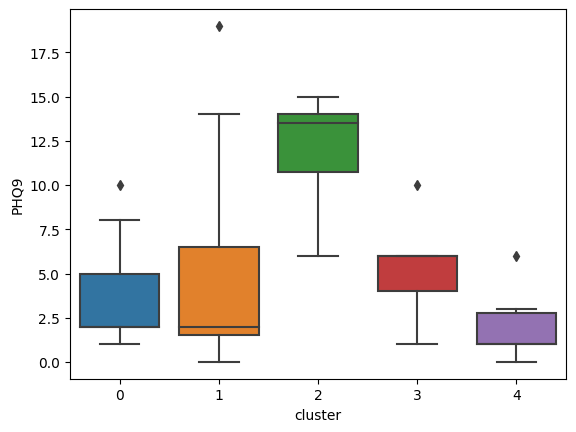

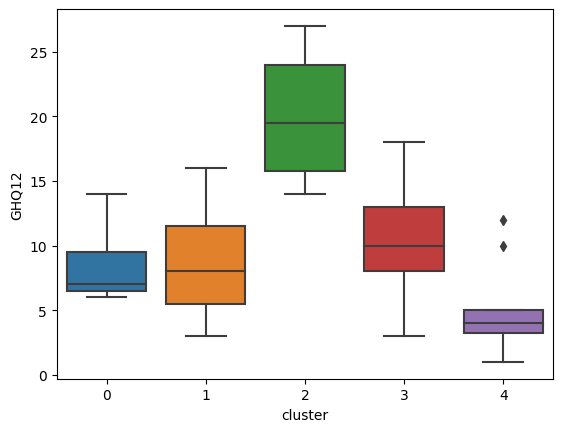

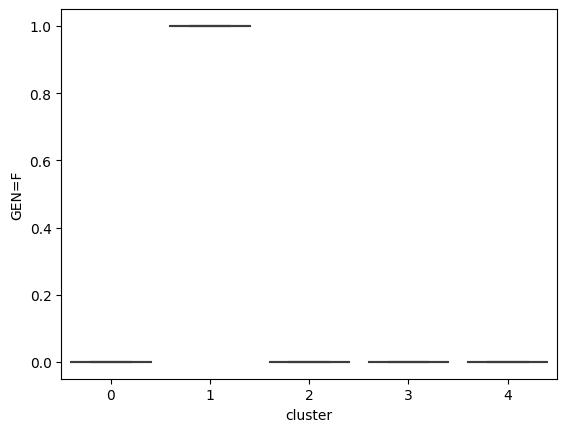

In [ ]:
for col in df.columns:
    if col != 'cluster':
        sns.boxplot(x='cluster', y=col, data=df)
        plt.show()


In [ ]:
df.to_csv(os.path.join(PATH_INTERMEDIATE,  'similar_user.csv'))

In [ ]:
df_label = LABELS_PROC.reset_index('timestamp')
merged_df = df_label.merge(df, left_index=True, right_on='pcode')

In [ ]:
label_distribution = merged_df.groupby(['cluster']).size().reset_index(name='count')

In [ ]:
label_distribution

,cluster,count
0,0,622
1,1,562
2,2,377
3,3,563
4,4,495


In [ ]:
(0.539 * 562  + 0.581 * 622 + 0.536 * 495+ 0.482 * 563 + 0.504*377 )/2619

0.5311164566628483

# Visualization of sensor features

## Screen on/off events (To detect sleep patterns)

In [ ]:
data = pd.read_csv(os.path.join(PATH_SENSOR,'P126','ScreenEvent.csv'))
data = data.assign(
         pcode ='P126',
         timestamp=lambda x: pd.to_datetime(x['timestamp'], unit='ms', utc=True).dt.tz_convert(DEFAULT_TZ)
     ).set_index(
        ['pcode', 'timestamp']
    ) 

In [ ]:
screen_on = data[data['type'].isin(['SCREEN_ON'])]
screen_off =data[data['type'].isin(['SCREEN_OFF'])]
unlock = data[data['type'].isin(['USER_PRESENT'])]
screen = data[data['type'].isin(['SCREEN_ON','SCREEN_OFF'])]

In [ ]:
Duration = []
#Calculate duration for each user
for pcode in data.index.get_level_values('pcode').unique():
    sub_screen = screen.loc[(pcode, ), :].sort_index(axis=0,level='timestamp').assign(pcode=pcode) # sort screen events by timestamp
    sub_screen = sub_screen.reset_index()
    sub_screen['screen_state'] = sub_screen['type'].shift().fillna('SCREEN_OFF') # create a new column to keep the previous screen event
#    sub_screen.loc[0, 'screen_state'] = 'OFF'
    sub_screen = sub_screen[sub_screen['screen_state'] != sub_screen['type']]
#    sub_screen.index = pd.to_datetime(sub_screen.index) # convert index to DatetimeIndex
    sub_screen['duration'] = sub_screen['timestamp'] - sub_screen['timestamp'].shift()
    sub_screen.loc[0, 'duration'] = pd.Timedelta(0)
    sub_screen = sub_screen[sub_screen['duration'] > pd.Timedelta(0)]
    sub_screen['duration_sec'] = sub_screen['duration'].dt.total_seconds()
    Duration.append(sub_screen)

Duration = pd.concat(Duration, axis=0, ignore_index=True).set_index(
        ['pcode', 'timestamp']
    ) 

In [ ]:
Duration

type screen_state  \
pcode timestamp                                                   
P126  2021-12-06 16:40:11.306000+09:00  SCREEN_OFF    SCREEN_ON   
      2021-12-06 16:40:13.935000+09:00   SCREEN_ON   SCREEN_OFF   
      2021-12-06 17:00:28.891000+09:00  SCREEN_OFF    SCREEN_ON   
      2021-12-06 17:03:27.204000+09:00   SCREEN_ON   SCREEN_OFF   
      2021-12-06 17:28:30.520000+09:00  SCREEN_OFF    SCREEN_ON   
...                                            ...          ...   
      2022-01-05 11:40:02.622000+09:00   SCREEN_ON   SCREEN_OFF   
      2022-01-05 11:40:53.213000+09:00  SCREEN_OFF    SCREEN_ON   
      2022-01-05 11:41:35.271000+09:00   SCREEN_ON   SCREEN_OFF   
      2022-01-05 11:43:03.751000+09:00  SCREEN_OFF    SCREEN_ON   
      2022-01-05 11:45:37.150000+09:00   SCREEN_ON   SCREEN_OFF   

                                                     duration  duration_sec  
pcode timestamp                                                              
P126  2021-12-06 16:40:11.306000+09:00 0 days 00:41:20.578000      2480.578  
      2021-12-06 16:40:13.935000+09:00 0 days 00:00:02.629000         2.629  
      2021-12-06 17:00:28.891000+09:00 0 days 00:20:14.956000      1214.956  
      2021-12-06 17:03:27.204000+09:00 0 days 00:02:58.313000       178.313  
      2021-12-06 17:28:30.520000+09:00 0 days 00:25:03.316000      1503.316  
...                                                       ...           ...  
      2022-01-05 11:40:02.622000+09:00 0 days 00:01:44.225000       104.225  
      2022-01-05 11:40:53.213000+09:00 0 days 00:00:50.591000        50.591  
      2022-01-05 11:41:35.271000+09:00 0 days 00:00:42.058000        42.058  
      2022-01-05 11:43:03.751000+09:00 0 days 00:01:28.480000        88.480  
      2022-01-05 11:45:37.150000+09:00 0 days 00:02:33.399000       153.399  

[4328 rows x 4 columns]

In [ ]:
Duration = Duration[Duration['screen_state'] =='SCREEN_ON']

In [ ]:
#The timestamp is the timestamp of screen_off event
#We need to check the end of time window if there is any screen on event while its screen off event is outside the timewindow
Duration 

type screen_state  \
pcode timestamp                                                   
P001  2021-11-24 09:40:21.751000+09:00  SCREEN_OFF    SCREEN_ON   
      2021-11-24 09:42:16.038000+09:00  SCREEN_OFF    SCREEN_ON   
      2021-11-24 09:42:25.209000+09:00  SCREEN_OFF    SCREEN_ON   
      2021-11-24 09:47:18.249000+09:00  SCREEN_OFF    SCREEN_ON   
      2021-11-24 10:07:26.298000+09:00  SCREEN_OFF    SCREEN_ON   
...                                            ...          ...   
      2021-12-21 15:53:34.036000+09:00  SCREEN_OFF    SCREEN_ON   
      2021-12-21 15:53:45.163000+09:00  SCREEN_OFF    SCREEN_ON   
      2021-12-21 15:53:49.635000+09:00  SCREEN_OFF    SCREEN_ON   
      2021-12-21 15:58:06.587000+09:00  SCREEN_OFF    SCREEN_ON   
      2021-12-21 16:50:20.201000+09:00  SCREEN_OFF    SCREEN_ON   

                                                     duration  duration_sec  
pcode timestamp                                                              
P001  2021-11-24 09:40:21.751000+09:00 0 days 00:00:20.090000        20.090  
      2021-11-24 09:42:16.038000+09:00 0 days 00:00:14.984000        14.984  
      2021-11-24 09:42:25.209000+09:00 0 days 00:00:08.831000         8.831  
      2021-11-24 09:47:18.249000+09:00 0 days 00:00:17.230000        17.230  
      2021-11-24 10:07:26.298000+09:00 0 days 00:20:06.961000      1206.961  
...                                                       ...           ...  
      2021-12-21 15:53:34.036000+09:00 0 days 00:00:02.057000         2.057  
      2021-12-21 15:53:45.163000+09:00 0 days 00:00:05.243000         5.243  
      2021-12-21 15:53:49.635000+09:00 0 days 00:00:03.400000         3.400  
      2021-12-21 15:58:06.587000+09:00 0 days 00:03:52.217000       232.217  
      2021-12-21 16:50:20.201000+09:00 0 days 00:45:39.515000      2739.515  

[967 rows x 4 columns]

In [ ]:
# Convert the 'timestamp' column to Unix timestamps
#data['timestamp'] = data['timestamp'].apply(lambda x: int(pd.Timestamp(x).timestamp() * 1000))

The below part should be modified since we only considered single user case previously
Treat yesterday sleep as an individual feature set

In [ ]:
screen = screen.reset_index()
screen_on =screen_on.reset_index()
screen_off =screen_off.reset_index()

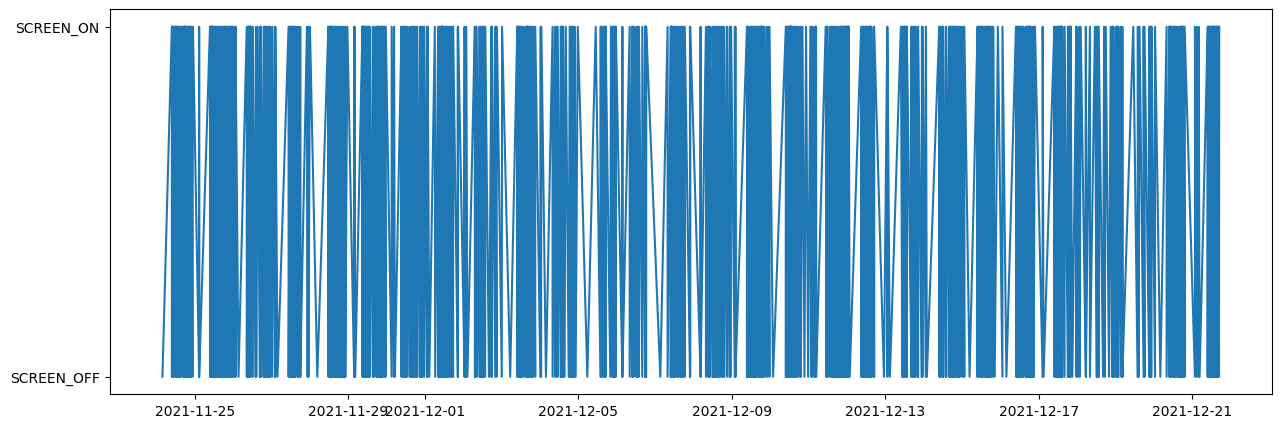

In [ ]:
import matplotlib.pyplot as plt
import mplcursors

fig, ax = plt.subplots(figsize=(15, 5))
line =ax.plot(pd.to_datetime(screen['timestamp'], unit='ms', utc=True).dt.tz_convert(DEFAULT_TZ), screen['type'])

cursor = mplcursors.cursor(line)
cursor.connect("add", lambda sel: sel.annotation.set_text(str(sel.artist.get_xdata()[sel.target.index])))
cursor.connect("add", lambda sel: sel.annotation.get_bbox_patch().set(fc="white"))

# Check for NaNs and add markers if necessary
nan_indices = screen[screen['type'].isna()].index
if len(nan_indices) > 0:
    sns.scatterplot(x=nan_indices, y=[0]*len(nan_indices), ax=ax, marker='x', color='red')
    ax.set_title(f'{len(nan_indices)} NaN values detected')
    
plt.show()

In [ ]:
#This fucntion is based on the  towards circadian computing: "early to bed and early to rise" 
#makes some of us unhealthy and sleep derived

def calculate_sleep_duration(s_on, s_off, theta):
    # Merge s_on and s_off into a single DataFrame based on timestamp
    df = pd.merge(pd.DataFrame({'timestamp': s_on, 'event': 'screen_on'}),
                  pd.DataFrame({'timestamp': s_off, 'event': 'screen_off'}),
                  how='outer', on='timestamp')
    # fill missing values in event_x with values from event_y, and vice versa
    df['event_x'] = df['event_x'].fillna(df['event_y'])
    df['event_y'] = df['event_y'].fillna(df['event_x'])

    # drop the event_x and event_y columns
    df = df.drop(columns=['event_y']).rename(columns={'event_x': 'event'})
    
    # Fill in missing timestamps with NaT and sort by timestamp
    df = df.fillna(pd.NaT).sort_values('timestamp')
    
    df=df.assign(
         timestamp=lambda x: pd.to_datetime(x['timestamp'], unit='ms', utc=True).dt.tz_convert(DEFAULT_TZ)
     )
    
    # Filter out screen-on events caused by notifications
    mask = (df['event'] == 'screen_off') & ((df['timestamp'].diff().fillna(pd.NaT)  / pd.Timedelta(seconds=1)) > theta)
    filtered_df = df[mask].reset_index(drop=True)

    # Discard non-usage patterns that do not start between 10PM to 7AM (next day)
    sleep_duration = pd.Series(dtype=float)
    sleep_onset = pd.Series(dtype="datetime64[ns]")
    for i in range(len(filtered_df)-1):
        if filtered_df.loc[i, 'timestamp'].hour >= 22 or filtered_df.loc[i, 'timestamp'].hour < 7:
            non_usage_duration = filtered_df.loc[i+1, 'timestamp'] - filtered_df.loc[i, 'timestamp']
            if non_usage_duration.total_seconds() > 0:
                sleep_duration = sleep_duration.append(pd.Series(non_usage_duration.total_seconds()))
                sleep_onset = sleep_onset.append(pd.Series(filtered_df.loc[i, 'timestamp']))

    # Calculate sleep midpoint and apply individual corrective term
    if len(sleep_duration) > 0:
        sleep_duration = sleep_duration.reset_index(drop=True)
        sleep_onset  =sleep_onset.reset_index(drop=True)
        sleep_midpoint = sleep_onset + pd.to_timedelta(sleep_duration/2, unit="s")
        return sleep_duration.max(), sleep_onset.iloc[sleep_duration.idxmax()], sleep_midpoint.iloc[sleep_duration.idxmax()]
    else:
        return None, None, None

In [ ]:
theta = 30 #30 seconds thresholds

In [ ]:
s_on_t = screen_on['timestamp']
s_off_t = screen_off['timestamp']

In [ ]:
calculate_sleep_duration(s_on_t, s_off_t, theta)

/tmp/ipykernel_289001/2121095048.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sleep_duration = sleep_duration.append(pd.Series(non_usage_duration.total_seconds()))
/tmp/ipykernel_289001/2121095048.py:35: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sleep_onset = sleep_onset.append(pd.Series(filtered_df.loc[i, 'timestamp']))
/tmp/ipykernel_289001/2121095048.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sleep_duration = sleep_duration.append(pd.Series(non_usage_duration.total_seconds()))
/tmp/ipykernel_289001/2121095048.py:35: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sleep_onset = sleep_onset.append(pd.Series(filt

(34352.292,
 Timestamp('2021-12-19 04:22:18.890000+0900', tz='pytz.FixedOffset(540)'),
 Timestamp('2021-12-19 09:08:35.036000+0900', tz='pytz.FixedOffset(540)'))

## Location(POI)

In [ ]:
data = pd.read_csv(os.path.join(PATH_SENSOR,'P002','Location.csv'))
data = data.assign(
         pcode ='P002',
         timestamp=lambda x: pd.to_datetime(x['timestamp'], unit='ms', utc=True).dt.tz_convert(DEFAULT_TZ)
     ).set_index(
        ['pcode', 'timestamp']
    ) 

In [ ]:
data

latitude   longitude   altitude  \
pcode timestamp                                                            
P002  2021-12-21 22:36:06.643000+09:00  36.374689  127.359048  92.099998   
      2021-12-21 22:32:30.863000+09:00  36.374513  127.359085  92.300003   
      2021-12-21 22:29:26.653000+09:00  36.374776  127.359252  93.700005   
      2021-12-21 22:25:23.773000+09:00  36.374953  127.359522  92.300003   
      2021-12-21 22:20:25.295000+09:00  36.374700  127.359261  92.300003   
...                                           ...         ...        ...   
      2021-11-23 22:15:51.178000+09:00  36.363543  127.356881  82.411987   
      2021-11-23 22:11:17.701000+09:00  36.363544  127.356937  81.944859   
      2021-11-23 21:59:24.442000+09:00  36.363573  127.356870  82.319820   
      2021-11-23 21:39:16.662000+09:00  36.363573  127.356878  82.070719   
      2021-11-23 21:32:48.402000+09:00  36.363571  127.356887  83.264593   

                                          accuracy     speed  
pcode timestamp                                               
P002  2021-12-21 22:36:06.643000+09:00   13.222000  0.000000  
      2021-12-21 22:32:30.863000+09:00   98.096001  0.000000  
      2021-12-21 22:29:26.653000+09:00    4.000000  1.074937  
      2021-12-21 22:25:23.773000+09:00  192.000000  0.137822  
      2021-12-21 22:20:25.295000+09:00   22.063000  0.000000  
...                                            ...       ...  
      2021-11-23 22:15:51.178000+09:00   13.354000  0.000000  
      2021-11-23 22:11:17.701000+09:00   15.650000  0.000000  
      2021-11-23 21:59:24.442000+09:00   19.259001  0.000000  
      2021-11-23 21:39:16.662000+09:00   17.721001  0.000000  
      2021-11-23 21:32:48.402000+09:00   17.392000  0.000000  

[4293 rows x 5 columns]

In [ ]:
def _haversine(_lat1, _lat2, _lng1, _lng2) -> float:
    if np.isnan(_lat1) or np.isnan(_lat2) or np.isnan(_lng1) or np.isnan(_lng2):
        return 0.0

    _lat1_r, _lat2_r, _lng1_r, _lng2_r = np.radians(_lat1), np.radians(_lat2), np.radians(_lng1), np.radians(_lng2)
    _lat = _lat2_r - _lat1_r
    _lng = _lng2_r - _lng1_r
    _R = 6371008.8
    _d = np.sin(_lat * 0.5) ** 2 + np.cos(_lat1_r) * np.cos(_lat2_r) * np.sin(_lng * 0.5) ** 2
    return 2 * _R * np.arcsin(np.sqrt(_d))

new_data = []
DISTANCE_MAX_IN_METRE = 100 #@param {type:"slider", min:25, max:500, step:25}
REGION_SIZE_IN_METRE = 250 #@param {type:"slider", min:25, max:500, step:25}
MAXIMUM_TIME_IN_MIN = 60 #@param {type:"slider", min:60, max:120, step:20}
MINIMUM_TIME_IN_MIN = 5 #@param {type:"slider", min:1, max:15, step:1}    

In [ ]:
#Weiszfeld algorithm to calculate midpoint in a cluster
def midpoint(data: pd.DataFrame) -> pd.DataFrame:
    # Load the GPS locations of the cluster into a NumPy array
    _data = np.array(data[['latitude','longitude']])
    # Set the initial estimate to the mean of the GPS coordinates
    midpoint = np.mean(_data, axis=0)
    # Define the stopping criterion
    epsilon = 1e-6
    # Define the maximum number of iterations
    max_iterations = 100
    # Define the Weiszfeld algorithm
    for i in range(max_iterations):
        # Compute the distances between the midpoint and the points
        distances = np.sqrt(np.sum((_data - midpoint)**2, axis=1))
        
        # Check if any distance is 0
        if np.any(distances == 0):
            idx = np.where(distances == 0)[0][0]
            return pd.DataFrame({'mid_latitude': _data[idx, 0], 'mid_longitude': _data[idx, 1]}, index=data.index)
       
        
        # Check if the stopping criterion has been reached
        if np.max(distances) < epsilon:
            break
        # Compute the weighted mean of the GPS coordinates
        weights = 1.0 / distances
        midpoint = np.sum(_data * weights[:, np.newaxis], axis=0) / np.sum(weights)
    return pd.DataFrame({'mid_latitude': midpoint[0], 'mid_longitude': midpoint[1]}, index=data.index)  

In [ ]:
import googlemaps

# Define the API key and client
API_KEY = YOUR_API_KEY_HERE
client = googlemaps.Client(API_KEY)

Eating = ['restaurant']
Social = ['bar','cafe','movie_theater','night_club']
Gym = ['gym']
known = Eating + Social + Gym

def label_cluster(data, radius):
    location = (data['mid_latitude'].mean(),data['mid_longitude'].mean())
    #return data['mid_latitude'].mean()
    # Perform the search
    results = client.places_nearby(location=location, radius=radius)
    # Filter the results by type (e.g. restaurant)
    known_places = [place for place in results['results'] if any(elem in place['types'] for elem in known)]
    if known_places:
        # Get the closest place to the location
        closest_place = min(known_places, key=lambda p: p.get('distance', {}).get('value', float('inf')))

        if any(elem in closest_place['types'] for elem in Social):
            data['label']='social'
        elif any(elem in closest_place['types'] for elem in Eating):
            data['label']='eating'
        else:
            data['label']='gym'
    else:
        data['label']='others'
    return data['label']

In [ ]:
import math

# Define the center and radius of the circle around KAIST main campus
center_lat_kaist, center_lon_kaist = (36.3722, 127.3600)
_radius_kaist = 1000 # meters

# Define the center and radius of the circle around KAIST Munji campus
center_lat_munji, center_lon_munji = (36.391944, 127.398611)
_radius_munji = 400 # meters

# Calculate the distances between the cluster centers and the center of the circle
def haversine(lat1, lon1, lat2, lon2):
    R = 6371000 # meters
    phi1 = math.radians(lat1)
    phi2 = math.radians(lat2)
    delta_phi = math.radians(lat2 - lat1)
    delta_lambda = math.radians(lon2 - lon1)
    a = math.sin(delta_phi/2)**2 + \
        math.cos(phi1)*math.cos(phi2)*math.sin(delta_lambda/2)**2
    c = 2*math.atan2(math.sqrt(a), math.sqrt(1 - a))
    d = R*c
    return d

In [ ]:
from poi import PoiCluster

#We need to do clustering individually
for pcode in data.index.get_level_values('pcode').unique():

    sub = data.loc[(pcode, ), :].sort_index(
        axis=0, level='timestamp'
    ).assign(
        _latitude=lambda x: x['latitude'].shift(1),
        _longitude=lambda x: x['longitude'].shift(1),
        dist=lambda x: x.apply(
            lambda y: _haversine(y['latitude'], y['_latitude'], y['longitude'], y['_longitude']),
            axis=1
        ),        
        pcode=pcode
    ).reset_index()

    # Convert the 'timestamp' column to Unix timestamps
    sub['timestamp'] = sub['timestamp'].apply(lambda x: int(pd.Timestamp(x).timestamp() * 1000))

    sub = sub[sub['accuracy']<100] #filter out those with accuracy below 100

    latlon_rad = np.radians(
        sub.loc[:, ['latitude', 'longitude']].to_numpy()
    )

    timestamps = sub.loc[:, 'timestamp'].values
    cluster = PoiCluster(
            d_max=DISTANCE_MAX_IN_METRE, r_max=REGION_SIZE_IN_METRE, t_max=MAXIMUM_TIME_IN_MIN * 60 * 1000, 
            t_min=MINIMUM_TIME_IN_MIN * 60 * 1000
        ).fit(
            X=latlon_rad, 
            timestamps=timestamps
        )
    labels = cluster.predict(X=latlon_rad)
    sub = sub.assign(cluster =labels)
    
    # replace empty strings with None
    sub['cluster'].replace('', 'NONE', inplace=True)
    
    sub[['mid_latitude','mid_longitude']] = sub.groupby('cluster', group_keys=False).apply(lambda x: midpoint(x)).apply(pd.Series)

    # convert the timestamp column to a datetime object
    sub=sub.assign(
            _timestamp=lambda x: pd.to_datetime(x['timestamp'], unit='ms', utc=True).dt.tz_convert(DEFAULT_TZ)
        )

    # Sort the data by timestamp in ascending order
    sub = sub.sort_values(by='_timestamp')
    sub['day_of_week'] = sub['_timestamp'].dt.dayofweek
    sub['hour_of_day'] = sub['_timestamp'].dt.hour
    sub['day_or_night'] = sub['_timestamp'].apply(lambda x: 1 if x.hour >= 9 and x.hour < 18 else 0)
    sub['wkday_or_wkend'] = sub['_timestamp'].apply(lambda x: 1 if x.dayofweek <=4  else 0)
    # Calculate the difference between consecutive timestamps for each location cluster
    sub['duration'] = sub['_timestamp'].shift(-1) - sub['_timestamp'] 
    # Replace missing values with 0
    sub = sub.fillna(pd.Timedelta(seconds=0))
    home = sub[sub['day_or_night']==0]['duration'].groupby(sub['cluster']).sum().idxmax()
    work = sub[sub['day_or_night']==1 ][ sub['wkday_or_wkend']==1][sub['cluster']!=home]['duration'].groupby(sub['cluster']).sum().idxmax()
    #Assign values to home and work clusters
    condition_home = sub['cluster'] == home
    condition_work = sub['cluster'] == work
    condition_none = sub['cluster'] == 'NONE'
    sub.loc[condition_home,'label']='home'
    sub.loc[condition_work,'label']='work'
    sub.loc[condition_none,'label']='none'
    
    radius = 100  # meters
    mask = sub['label'].isna()
    sub['label'] = sub[mask].groupby('cluster', group_keys=False).apply(lambda x: label_cluster(x, radius)).apply(pd.Series)
    
    #Assign values again to home and work clusters
    condition_home = sub['cluster'] == home
    condition_work = sub['cluster'] == work
    condition_none = sub['cluster'] == 'NONE'
    sub.loc[condition_home,'label']='home'
    sub.loc[condition_work,'label']='work'
    sub.loc[condition_none,'label']='none'
    
    centers = sub[sub['label']=='others'].groupby('cluster').mean()
    distances_kaist = centers.apply(lambda row: haversine(center_lat_kaist, center_lon_kaist, row['latitude'], row['longitude']), axis=1)
    distances_munji = centers.apply(lambda row: haversine(center_lat_munji, center_lon_munji, row['latitude'], row['longitude']), axis=1)

    # Check which cluster centers are within the circle
    in_circle_kaist = distances_kaist <= _radius_kaist
    cluster_centers_in_circle_kaist = centers[in_circle_kaist]
    
    in_circle_munji = distances_munji <= _radius_munji
    cluster_centers_in_circle_munji = centers[in_circle_munji]
    
    cluster_centers_in_circle = pd.concat([cluster_centers_in_circle_kaist, cluster_centers_in_circle_munji])
    
    condition_work_other = sub['cluster'].isin(cluster_centers_in_circle.index)
    sub.loc[condition_work_other, 'label'] = 'work'
    
    

    new_data.append(sub)

new_data = pd.concat(new_data, axis=0, ignore_index=True).set_index(
    ['pcode', 'timestamp']
)


/tmp/ipykernel_289001/614905951.py:59: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  work = sub[sub['day_or_night']==1 ][ sub['wkday_or_wkend']==1][sub['cluster']!=home]['duration'].groupby(sub['cluster']).sum().idxmax()
/tmp/ipykernel_289001/614905951.py:80: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  centers = sub[sub['label']=='others'].groupby('cluster').mean()


In [ ]:
new_data['duration_sec'] = new_data['duration'].dt.total_seconds()

In [ ]:
_new_data = new_data.loc[lambda x: x['label']!='none']

In [ ]:
cnt = _new_data['label'].value_counts()

_val, _sup = cnt.index, cnt.values

DUR = {'DUR_{}'.format(_k): _new_data[_new_data['label'] == '{}'.format(_k)]['duration_sec'].astype('float32') for _k in _val}


In [ ]:
data[data['accuracy']<100]['speed'].astype('float32')

pcode  timestamp                       
P002   2021-12-21 22:36:06.643000+09:00    0.000000
       2021-12-21 22:32:30.863000+09:00    0.000000
       2021-12-21 22:29:26.653000+09:00    1.074937
       2021-12-21 22:20:25.295000+09:00    0.000000
       2021-12-21 22:18:25.401000+09:00    0.298384
                                             ...   
       2021-11-23 22:15:51.178000+09:00    0.000000
       2021-11-23 22:11:17.701000+09:00    0.000000
       2021-11-23 21:59:24.442000+09:00    0.000000
       2021-11-23 21:39:16.662000+09:00    0.000000
       2021-11-23 21:32:48.402000+09:00    0.000000
Name: speed, Length: 4013, dtype: float32

In [ ]:
DUR

{'DUR_home': pcode  timestamp    
 P002   1637693972043     210.167007
        1637694182210     181.022995
        1637694363233    5517.354004
        1637699880587     239.421005
        1637700120008     105.054001
                            ...     
        1640092705401     119.893997
        1640092825295     541.357971
        1640093366653     184.210007
        1640093550863     215.779999
        1640093766643       0.000000
 Name: duration_sec, Length: 2914, dtype: float32,
 'DUR_eating': pcode  timestamp    
 P002   1637670768402     388.260010
        1637671156662    1207.780029
        1637672364442     713.258972
        1637673077701     273.476990
        1637673351178     162.453995
                            ...     
        1639907566741     139.072998
        1639907705814    2034.281006
        1639909740095    2577.448975
        1639912317544     126.789001
        1639912444333     236.436996
 Name: duration_sec, Length: 435, dtype: float32,
 'DUR_work': pc

Number of locations visited

In [ ]:
len(new_data[new_data['cluster']!='NONE'].cluster.unique())

11

In [ ]:
import plotly.graph_objs as go

#@markdown For drawing GPS coordinates, we need a [MapBox](https://mapbox.com)'s access token. 
MAPBOX_ACCESS_TOKEN = 'pk.eyJ1Ijoia2VsdHBvd2VyMCIsImEiOiJjazFiZ3cxZzUwMjVhM2hyMTBvcHYwcHlxIn0.mZTYvOHmJeqBANdFC1HFkw' #@param {type:"string"}

# Visualize
fig = go.Figure()

for label in new_data.loc[:, 'cluster'].unique():
  sub = new_data.loc[lambda x: x['cluster'] == label, :]
  fig.add_trace(
      go.Scattermapbox(
          lat=sub.loc[:, 'latitude'], 
          lon=sub.loc[:, 'longitude'],
          name=label,
          hovertext=label,
          opacity=0.2 if label == 'NONE' else 1.0,
          marker=dict(
            color='grey' if label == 'NONE' else None
        )
      )
  )

fig.update_layout(
    autosize=True,
    mapbox=go.layout.Mapbox(
        accesstoken=MAPBOX_ACCESS_TOKEN,
        center=go.layout.mapbox.Center(
            lat=new_data.iloc[0]['latitude'],
            lon=new_data.iloc[0]['longitude'],
        ),
        zoom=12
    )
)
fig.show()

new_data.head()

latitude   longitude   altitude   accuracy  speed  \
pcode timestamp                                                           
P002  1637670768402  36.363571  127.356887  83.264593  17.392000    0.0   
      1637671156662  36.363573  127.356878  82.070719  17.721001    0.0   
      1637672364442  36.363573  127.356870  82.319820  19.259001    0.0   
      1637673077701  36.363544  127.356937  81.944859  15.650000    0.0   
      1637673351178  36.363543  127.356881  82.411987  13.354000    0.0   

                           _latitude       _longitude      dist cluster  \
pcode timestamp                                                           
P002  1637670768402  0 days 00:00:00  0 days 00:00:00  0.000000  3C77E9   
      1637671156662        36.363571       127.356887  0.818702  3C77E9   
      1637672364442        36.363573       127.356878  0.752894  3C77E9   
      1637673077701        36.363573        127.35687  6.811169  3C77E9   
      1637673351178        36.363544       127.356937  5.015152  3C77E9   

                     mid_latitude  mid_longitude  \
pcode timestamp                                    
P002  1637670768402     36.363304     127.357296   
      1637671156662     36.363304     127.357296   
      1637672364442     36.363304     127.357296   
      1637673077701     36.363304     127.357296   
      1637673351178     36.363304     127.357296   

                                          _timestamp  day_of_week  \
pcode timestamp                                                     
P002  1637670768402 2021-11-23 21:32:48.402000+09:00            1   
      1637671156662 2021-11-23 21:39:16.662000+09:00            1   
      1637672364442 2021-11-23 21:59:24.442000+09:00            1   
      1637673077701 2021-11-23 22:11:17.701000+09:00            1   
      1637673351178 2021-11-23 22:15:51.178000+09:00            1   

                     hour_of_day  day_or_night  wkday_or_wkend  \
pcode timestamp                                                  
P002  1637670768402           21             0               1   
      1637671156662           21             0               1   
      1637672364442           21             0               1   
      1637673077701           22             0               1   
      1637673351178           22             0               1   

                                  duration   label  
pcode timestamp                                     
P002  1637670768402 0 days 00:06:28.260000  eating  
      1637671156662 0 days 00:20:07.780000  eating  
      1637672364442 0 days 00:11:53.259000  eating  
      1637673077701 0 days 00:04:33.477000  eating  
      1637673351178 0 days 00:02:42.454000  eating

In [ ]:
import folium

# Define the center of KAIST
kaist_center = [36.3722, 127.3600]
#kaist_center = [36.3721427, 127.36039]

# Define the map object with the center of KAIST as the starting point
m = folium.Map(location=kaist_center, zoom_start=13)

# Define a circle marker at the center of KAIST
folium.CircleMarker(
    location=kaist_center,
    radius=5,
    color='red',
    fill=True,
    fill_color='red',
    fill_opacity=1.0,
    popup='KAIST Center',
).add_to(m)

# Define a circle around the center of KAIST with a radius of 1 km
folium.Circle(
    location=kaist_center,
    radius=1000,
    color='blue',
    fill=False,
    popup='1 km radius boundary',
).add_to(m)

# Display the map object
m


In [ ]:
import folium
# Define the center of KAIST Munji
kaist_center = [36.391944, 127.398611]

#kaist_center = [36.3721427, 127.36039]

# Define the map object with the center of KAIST as the starting point
m = folium.Map(location=kaist_center, zoom_start=13)

# Define a circle marker at the center of KAIST
folium.CircleMarker(
    location=kaist_center,
    radius=5,
    color='red',
    fill=True,
    fill_color='red',
    fill_opacity=1.0,
    popup='KAIST Center',
).add_to(m)

# Define a circle around the center of KAIST with a radius of 1 km
folium.Circle(
    location=kaist_center,
    radius=400,
    color='blue',
    fill=False,
    popup='1 km radius boundary',
).add_to(m)

# Display the map object
m

In [ ]:
import plotly.graph_objs as go

#@markdown For drawing GPS coordinates, we need a [MapBox](https://mapbox.com)'s access token. 
MAPBOX_ACCESS_TOKEN = 'pk.eyJ1Ijoia2VsdHBvd2VyMCIsImEiOiJjazFiZ3cxZzUwMjVhM2hyMTBvcHYwcHlxIn0.mZTYvOHmJeqBANdFC1HFkw' #@param {type:"string"}

# Visualize
fig = go.Figure()

for label in new_data.loc[:, 'label'].unique():
  sub = new_data.loc[lambda x: x['label'] == label, :]
  fig.add_trace(
      go.Scattermapbox(
          lat=sub.loc[:, 'latitude'], 
          lon=sub.loc[:, 'longitude'],
          name=label,
          hovertext=label,
          opacity=0.2 if label == 'NONE' else 1.0,
      )
  )

fig.update_layout(
    autosize=True,
    mapbox=go.layout.Mapbox(
        accesstoken=MAPBOX_ACCESS_TOKEN,
        center=go.layout.mapbox.Center(
            lat=new_data.iloc[0][ 'latitude'],
            lon=new_data.iloc[0][ 'longitude'],
        ),
        zoom=12
    )
)
fig.show()

In [ ]:
# Sum the differences to get the total duration stayed at each location cluster
total_durations = new_data['duration'].groupby(new_data['label']).sum().dt.total_seconds()

print(total_durations)

label
eating     332533.691
home      1788932.075
none        76367.422
social      31853.009
work       193312.044
Name: duration, dtype: float64


Text(0, 0.5, 'Duration in seconds')

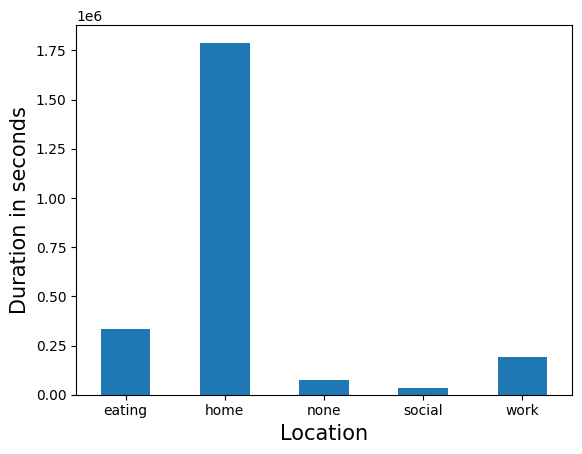

In [ ]:
import matplotlib.pyplot as plt
total_durations.plot(kind='bar', rot=0)
plt.xlabel('Location',fontsize=15)
plt.ylabel('Duration in seconds',fontsize=15)

## Activity Transition

In [ ]:
data = pd.read_csv(os.path.join(PATH_SENSOR,'P003','ActivityTransition.csv'))
data = data.assign(
         pcode ='P003',
         timestamp=lambda x: pd.to_datetime(x['timestamp'], unit='ms', utc=True).dt.tz_convert(DEFAULT_TZ)
     ).set_index(
        ['pcode', 'timestamp']
    ) 

In [ ]:
data = data.loc[
        lambda x: x['typeEnter'].isin(['WALKING', 'STILL', 'IN_VEHICLE', 'ON_BICYCLE', 'RUNNING']), :
    ].assign(
        type=lambda x: x['typeEnter']
    )

In [ ]:
Duration = []
#Calculate duration for each user
for pcode in data.index.get_level_values('pcode').unique():
    sub_act = data.loc[(pcode, ), :].sort_index(axis=0,level='timestamp').assign(pcode=pcode) # sort screen events by timestamp
    sub_act = sub_act.reset_index()
#    sub_act['screen_state'] = sub_screen['type'].shift().fillna('OFF') # create a new column to keep the previous screen event
#    sub_screen.loc[0, 'screen_state'] = 'OFF'
#    sub_act = sub_act[sub_act['screen_state'] != sub_screen['type']]
#    sub_act.index = pd.to_datetime(sub_act.index) # convert index to DatetimeIndex
    sub_act['duration'] = sub_act['timestamp'].shift(-1) -sub_act['timestamp'] 
    sub_act.loc[-1, 'duration'] = pd.Timedelta(0)
    sub_act = sub_act[sub_act['duration'] > pd.Timedelta(0)]
    sub_act['duration_sec'] = sub_act['duration'].dt.total_seconds()
    Duration.append(sub_act)

Duration = pd.concat(Duration, axis=0, ignore_index=True).set_index(
        ['pcode', 'timestamp']
    ) 

In [ ]:
cnt = Duration['type'].value_counts()

_val, _sup = cnt.index, cnt.values

DUR = {'DUR_{}'.format(_k): Duration[Duration['type'] == '{}'.format(_k)]['duration_sec'].astype('float32') for _k in _val}

In [ ]:
data['type'].astype('object')

pcode  timestamp                       
P003   2021-11-23 23:35:12.288000+09:00       WALKING
       2021-11-23 23:37:13.750000+09:00         STILL
       2021-11-23 23:38:29.852000+09:00       WALKING
       2021-11-23 23:41:08.674000+09:00         STILL
       2021-11-24 01:39:14.348000+09:00       WALKING
                                              ...    
       2021-12-21 21:43:56.783000+09:00       WALKING
       2021-12-21 21:48:55.943000+09:00    IN_VEHICLE
       2021-12-21 22:05:15.972000+09:00         STILL
       2021-12-21 22:17:50.935000+09:00       WALKING
       2021-12-21 22:21:06.886000+09:00         STILL
Name: type, Length: 1360, dtype: object

## Message Event

In [ ]:
data = pd.read_csv(os.path.join(PATH_SENSOR,'P003','MessageEvent.csv'))
data = data.assign(
         pcode ='P003',
         timestamp=lambda x: pd.to_datetime(x['timestamp'], unit='ms', utc=True).dt.tz_convert(DEFAULT_TZ)
     ).set_index(
        ['pcode', 'timestamp']
    ) 

In [ ]:
from collections import defaultdict

new_data = defaultdict(list)

for pcode in data.index.get_level_values('pcode').unique():
    sub = data.loc[(pcode, ), :].sort_index(
        axis=0, level='timestamp'
    )

    sent = sub.loc[
        lambda x: x['messageBox'] == 'SENT', :
    ].assign(
        event=1,
        pcode=pcode
    ).reset_index()

    recv = sub.loc[
        lambda x: x['messageBox'] == 'INBOX', :
    ].assign(
        event=1,
        pcode=pcode
    ).reset_index()

    msg = sub.assign(
        event=1,
        pcode=pcode
    ).reset_index()

    new_data['SNT'].append(sent)
    new_data['RCV'].append(recv)
    new_data['ALL'].append(msg)

In [ ]:
{
        k: pd.concat(
            v, axis=0, ignore_index=True
        ).set_index(
            ['pcode', 'timestamp']
        )['event'].astype('float32') 
        for k, v in new_data.items()
}

{'SNT': pcode  timestamp                
 P003   2021-11-24 01:32:37+09:00    1.0
        2021-11-24 01:32:55+09:00    1.0
 Name: event, dtype: float32,
 'RCV': pcode  timestamp                       
 P003   2021-11-23 13:54:07.466000+09:00    1.0
        2021-11-23 15:02:04.464000+09:00    1.0
        2021-11-23 18:06:19+09:00           1.0
        2021-11-23 18:36:58+09:00           1.0
        2021-11-23 21:32:31+09:00           1.0
                                           ... 
        2021-12-20 14:30:06+09:00           1.0
        2021-12-20 15:39:50.602000+09:00    1.0
        2021-12-20 16:52:25.082000+09:00    1.0
        2021-12-21 05:26:45.032000+09:00    1.0
        2021-12-21 09:59:18.315000+09:00    1.0
 Name: event, Length: 143, dtype: float32,
 'ALL': pcode  timestamp                       
 P003   2021-11-23 13:54:07.466000+09:00    1.0
        2021-11-23 15:02:04.464000+09:00    1.0
        2021-11-23 18:06:19+09:00           1.0
        2021-11-23 18:36:58+09:00   

## Step Count

In [ ]:
data = pd.read_csv(os.path.join(PATH_SENSOR,'P003','Fitbit-StepCount.csv'))
data = data.assign(
         pcode ='P003',
         timestamp=lambda x: pd.to_datetime(x['timestamp'], unit='ms', utc=True).dt.tz_convert(DEFAULT_TZ)
     ).set_index(
        ['pcode', 'timestamp']
    ) 

In [ ]:
data

value
pcode timestamp                       
P003  2021-11-23 22:54:00+09:00      9
      2021-11-23 23:34:00+09:00     37
      2021-11-23 23:35:00+09:00     94
      2021-11-23 23:36:00+09:00     32
      2021-11-23 23:38:00+09:00    101
...                                ...
      2021-12-21 21:17:00+09:00      6
      2021-12-21 21:22:00+09:00      8
      2021-12-21 21:36:00+09:00      9
      2021-12-21 21:39:00+09:00      6
      2021-12-21 21:41:00+09:00     18

[5049 rows x 1 columns]

In [ ]:
data['value'].dropna().astype('float32')

pcode  timestamp                
P003   2021-11-23 22:54:00+09:00      9.0
       2021-11-23 23:34:00+09:00     37.0
       2021-11-23 23:35:00+09:00     94.0
       2021-11-23 23:36:00+09:00     32.0
       2021-11-23 23:38:00+09:00    101.0
                                    ...  
       2021-12-21 21:17:00+09:00      6.0
       2021-12-21 21:22:00+09:00      8.0
       2021-12-21 21:36:00+09:00      9.0
       2021-12-21 21:39:00+09:00      6.0
       2021-12-21 21:41:00+09:00     18.0
Name: value, Length: 5049, dtype: float32

## App Usage

First, we need to label the app category using the following code

In [ ]:
import pandas as pd
import os
from glob import glob
from tqdm import tqdm

import requests
from bs4 import BeautifulSoup
import json
from typing import List
from typing import List
def get_ld_json(url: str) -> List[dict]:
    parser = "html.parser"
    req = requests.get(url)
    soup = BeautifulSoup(req.text, parser)
    dics = []
    for elem in soup.findAll("script", {"type":"application/ld+json"}):
        dics.append(json.loads("".join(elem.contents)))
    return dics

from selenium import webdriver as webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.chrome.service import Service
from webdriver_manager.chrome import ChromeDriverManager
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.chrome.options import Options
from selenium.common.exceptions import InvalidSessionIdException

CHROME_DRIVER_PATH ="/home/panyu/Drivers/chrome/chromedriver"

#parameter
#driver_path: driver path of Chrome
#app_list: package name of apps that we want to extract 
#return
#DataFrame: which include app name, app category based on the package name
#internal algorithm
def extractAppCategory1(app_list:list) -> pd.DataFrame:
    dics = []
    for id in tqdm(app_list):
        #since driver gives ambiguous stucking without any error message
        #driver is recalled for every iteration
        # driver = webdriver.Chrome(service=Service(CHROME_DRIVER_PATH), options=chrome_options)
        dic = {}
        dic['package'] = id
        try:
            jsons = get_ld_json(f"https://play.google.com/store/apps/details?id={id}&hl=en_US&gl=US")
            for json_ in jsons:
                url = json_['url']
                url = url[url.find("?id=") + len("?id="):]
                id_ = url.split("&")[0]
                if id_ != id:
                    continue
                dic['name'] = json_['name']
                dic['category']= json_['applicationCategory']
                dic['source']= 'play.google.com'
            # driver.get(f"https://play.google.com/store/apps/details?id={id}&hl=en_US&gl=US")
            # elem = WebDriverWait(driver, 30).until(EC.presence_of_element_located((By.TAG_NAME, "body")))
            # elem = driver.find_element(By.XPATH, "//a[@itemprop='genre']")
            # category = elem.get_attribute('href').split('/')[-1]
            # elem = driver.find_element(By.XPATH, "//h1[@itemprop='name']")
            # dic['category'] = category
            # dic['name'] = elem.text
            # dic['source'] = 'play.google.com'
        except Exception as e:
            # pass
            print("play store:", id,",", e.__class__)
            #initialize the driver
        dics.append(dic)
    app = pd.DataFrame(dics)
    return app
def extractAppCategory2(app:pd.DataFrame)->pd.DataFrame:
    chrome_options = Options()
    chrome_options.add_argument("--lang=en")
    driver = webdriver.Chrome(service=Service(CHROME_DRIVER_PATH), options=chrome_options)
    driver.get('https://apkpure.com')
    driver.add_cookie({'name':'apkpure__lang', 'domain': 'apkpure.com', 'value':'en'})
    for idx in tqdm(app['category'][app['category'].isna()].index):
        id = app.iloc[idx]['package']
        try:
            driver.get('https://apkpure.com')
            elem = WebDriverWait(driver, 30).until(EC.presence_of_element_located((By.TAG_NAME, "body")))
            elem = driver.find_element(By.XPATH,'//input[@name = "q"]')
            elem.send_keys(id)
            elem = driver.find_element(By.XPATH,'//input[@class = "si"]')
            elem.click()    
            elem = WebDriverWait(driver, 30).until(EC.presence_of_element_located((By.TAG_NAME, "body")))
            elem = driver.find_element(By.XPATH, "//*[@id='search-res']/dl[1]/dd/p[1]/a")
            if elem.get_attribute('href').split('/')[-1] == id:
                driver.get(elem.get_attribute('href'))
                driver.add_cookie({'name':'apkpure__lang', 'domain': str('apkpure.com'), 'value':'en'})
                elem = WebDriverWait(driver, 30).until(EC.presence_of_element_located((By.TAG_NAME, "body")))
                if driver.find_element(By.XPATH, "//div[@class = 'title bread-crumbs']/a[2]").text == "Games":
                    category = "GAME_" + driver.find_element(By.XPATH, "//div[@class = 'title bread-crumbs']/a[3]").text.upper().replace(' & ','_AND_').replace(' ','_') 
                else:
                    category = driver.find_element(By.XPATH, "//div[@class = 'title bread-crumbs']/a[3]").text.upper().replace(' & ','_AND_').replace(' ','_') 
                elem = driver.find_element(By.XPATH, "//div[@class='title-like']")
                app.iloc[idx]['category'] = category
                app.iloc[idx]['name'] = elem.text
                app.iloc[idx]['source'] = 'apkpure.com'
        except Exception as e:
                pass
                # print("apkpure.com:",id , ",", e.__class__)
    driver.close()
    return app
def extractAppCategory3(app:pd.DataFrame)->pd.DataFrame:
    chrome_options = Options()
    chrome_options.add_argument("--lang=en")
    driver = webdriver.Chrome(service=Service(CHROME_DRIVER_PATH), options=chrome_options)
    driver.get('https://apkcombo.com')
    driver.add_cookie({'name':'__apkcombo_lang', 'domain': str('apkcombo.com'), 'value':'en'})
    for idx in tqdm(app['category'][app['category'].isna()].index):
        id = app.iloc[idx]['package']
        try:
            driver.get('https://apkcombo.com')
            elem = WebDriverWait(driver, 30).until(EC.presence_of_element_located((By.TAG_NAME, "body")))
            elem = driver.find_element(By.NAME,'q')
            elem.send_keys(id)
            elem = driver.find_element(By.CLASS_NAME,'button-search')
            elem.click()    
            elem = WebDriverWait(driver, 30).until(EC.presence_of_element_located((By.TAG_NAME, "body")))
            if driver.find_element(By.XPATH, "//nav[@class = 'breadcrumb']/p[2]/a").text == "Games":
                    category = "GAME_" + driver.find_element(By.XPATH, "//nav[@class = 'breadcrumb']/p[3]/a").text.upper().replace(' & ','_AND_').replace(' ','_') 
            else:
                category = driver.find_element(By.XPATH, "//nav[@class = 'breadcrumb']/p[3]/a").text.upper().replace(' & ','_AND_').replace(' ','_')       
            elem = driver.find_element(By.XPATH, "//div[@class='app_name']")
            app.iloc[idx]['category'] = category
            app.iloc[idx]['name'] = elem.text
            app.iloc[idx]['source'] = 'apkcombo.com'
        except Exception as e:
            pass
            # print("apkcombo.com:",id , ",", e.__class__)
    driver.close()
    return app
# Make Entire app List from the data
src = PATH_SENSOR
uids = os.listdir(src)
types = ["ACTIVITY_RESUMED","ACTIVITY_PAUSED"]

app_list = []
for uid in uids:
    dfs = []
    for path in sorted(glob(os.path.join(src, uid, 'AppUsageEvent.csv'))):
        dfs.append(pd.read_csv(path, index_col = False, header = 0))
    df = pd.concat(dfs)
    df = df.query('type in @types')
    app_list += list(df['packageName'].values)
app_list = sorted(set(app_list))
print("# Total Apps:", len(app_list))

df = extractAppCategory1(app_list)
print(df.info())
df.to_csv(os.path.join(PATH_INTERMEDIATE,"app_category.csv"))
df = extractAppCategory2(df)
print(df.info())
df.to_csv(os.path.join(PATH_INTERMEDIATE,"app_category.csv"))
df = extractAppCategory3(df)
print(df.info())
df.to_csv(os.path.join(PATH_INTERMEDIATE,"app_category.csv"))

ModuleNotFoundError: No module named 'selenium'

In [ ]:
df.to_csv(os.path.join(PATH_INTERMEDIATE,"app_category.csv"),index=False)

NameError: name 'df' is not defined

In [ ]:
app_category = pd.read_csv(os.path.join(PATH_INTERMEDIATE, "app_category.csv"), index_col=False)

In [ ]:
app_category.loc[app_category['package']=='kaist.iclab.abclogger','category'] ='TOOLS'

In [ ]:
app_category['category'] = app_category['category'].fillna('UNKNOWN')

In [ ]:
app_category.category.value_counts()

TOOLS                        259
FINANCE                      139
LIFESTYLE                    135
SHOPPING                     103
PRODUCTIVITY                  94
ENTERTAINMENT                 68
HEALTH_AND_FITNESS            66
UNKNOWN                       61
EDUCATION                     57
COMMUNICATION                 44
SOCIAL                        43
FOOD_AND_DRINK                41
PHOTOGRAPHY                   38
MAPS_AND_NAVIGATION           36
MUSIC_AND_AUDIO               36
BOOKS_AND_REFERENCE           32
BUSINESS                      31
TRAVEL_AND_LOCAL              29
GAME_STRATEGY                 20
GAME_PUZZLE                   20
VIDEO_PLAYERS                 15
GAME_SIMULATION               14
GAME_ROLE_PLAYING             14
GAME_CASUAL                   13
BEAUTY                        13
AUTO_AND_VEHICLES             10
COMICS                        10
GAME_MUSIC                     9
GAME_ADVENTURE                 9
PERSONALIZATION                8
NEWS_AND_M

In [ ]:
app_category.to_csv(os.path.join(PATH_INTERMEDIATE,"app_category.csv"),index=False)

In [ ]:
name= 'AppUsageEvent'
paths = [
    (d, os.path.join(PATH_SENSOR, d, f'{name}.csv'))
    for d in os.listdir(PATH_SENSOR)
    if d.startswith('P')
]


for pcode, p in paths:
    if os.path.exists(p):
        temp = pd.read_csv(p)
        temp = temp.loc[
            lambda x: x['type'].isin(types), :
        ]  

        # Merge temp with app_categories_unique DataFrame on the 'package' column
        temp = temp.merge(app_category, left_on='packageName', right_on='package', how='left')

        # Drop the unnecessary 'package' column
        temp = temp.drop(columns=['package'])
       

        # Save the merged DataFrame to a CSV file
#        temp.to_csv(p, index=False)

In [ ]:
data = pd.read_csv(os.path.join(PATH_SENSOR,'P119','AppUsageEvent.csv'))
data = data.assign(
         pcode ='P119',
         timestamp=lambda x: pd.to_datetime(x['timestamp'], unit='ms', utc=True).dt.tz_convert(DEFAULT_TZ)
     ).set_index(
        ['pcode', 'timestamp']
    ) 

In [ ]:
from Funcs.Utility import transform

data = data.loc[
    lambda x: x['type'].isin(['ACTIVITY_RESUMED', 'ACTIVITY_PAUSED']), :
].assign(
#        packageName=lambda x: np.where(x['type'] == 'MOVE_TO_FOREGROUND', x['packageName'], None),
    category=lambda x: np.where((x['type'] == 'ACTIVITY_RESUMED') | (x['type'] == 'ACTIVITY_PAUSED'), x['category'], None),
)

data = data.rename(columns={'category':'subcategory'})
data['category'] = [transform[item] for item in data['subcategory'].values]

In [ ]:
_data = data[(data['category']!='SYSTEM') & (data['category']!='UNKNOWN')]

In [ ]:
Duration = []
#Calculate duration for each user
for pcode in data.index.get_level_values('pcode').unique():
    sub_app = _data.loc[(pcode, ), :].sort_index(axis=0,level='timestamp').assign(pcode=pcode) # sort screen events by timestamp
    sub_app = sub_app.reset_index()
    sub_app['app_state'] = sub_app['type'].shift().fillna('ACTIVITY_PAUSED') # create a new column to keep the previous screen event
#    sub_screen.loc[0, 'screen_state'] = 'OFF'
    sub_app = sub_app[sub_app['app_state'] != sub_app['type']]
    
#    sub_app.index = pd.to_datetime(sub_app.index) # convert index to DatetimeIndex
    sub_app['duration'] = sub_app['timestamp'] - sub_app['timestamp'].shift()
    sub_app.loc[0, 'duration'] = pd.Timedelta(0)
    sub_app = sub_app[sub_app['duration'] > pd.Timedelta(0)]
    sub_app['duration_sec'] = sub_app['duration'].dt.total_seconds()
    Duration.append(sub_app)

Duration = pd.concat(Duration, axis=0, ignore_index=True).set_index(
        ['pcode', 'timestamp']
    ) 

In [ ]:
Duration = Duration[Duration['app_state'] == 'ACTIVITY_RESUMED']

In [ ]:
Duration[['packageName','name_x','app_state','type','category']].head(20)

packageName  \
pcode timestamp                                                        
P001  2021-11-24 01:37:50.876000+09:00  com.sec.android.app.sbrowser   
      2021-11-24 01:41:14.925000+09:00  com.sec.android.app.sbrowser   
      2021-11-24 01:42:00.485000+09:00  com.sec.android.app.sbrowser   
      2021-11-24 01:42:07.657000+09:00                com.kakao.talk   
      2021-11-24 01:42:10.141000+09:00       com.fitbit.FitbitMobile   
      2021-11-24 01:42:12.887000+09:00       com.fitbit.FitbitMobile   
      2021-11-24 01:42:17.590000+09:00       com.fitbit.FitbitMobile   
      2021-11-24 01:42:23.141000+09:00                com.kakao.talk   
      2021-11-24 01:42:24.049000+09:00       com.fitbit.FitbitMobile   
      2021-11-24 01:42:28.965000+09:00       com.fitbit.FitbitMobile   
      2021-11-24 01:42:29.123000+09:00       com.fitbit.FitbitMobile   
      2021-11-24 01:42:46.143000+09:00         com.google.android.gm   
      2021-11-24 01:42:46.329000+09:00  com.sec.android.app.sbrowser   
      2021-11-24 01:42:50.204000+09:00  com.sec.android.app.sbrowser   
      2021-11-24 01:42:52.551000+09:00       com.fitbit.FitbitMobile   
      2021-11-24 01:42:52.638000+09:00       com.fitbit.FitbitMobile   
      2021-11-24 01:42:54.606000+09:00       com.fitbit.FitbitMobile   
      2021-11-24 01:42:54.731000+09:00       com.fitbit.FitbitMobile   
      2021-11-24 01:42:56.808000+09:00       com.fitbit.FitbitMobile   
      2021-11-24 01:44:04.539000+09:00  com.sec.android.app.sbrowser   

                                                  name_x         app_state  \
pcode timestamp                                                              
P001  2021-11-24 01:37:50.876000+09:00  Samsung Internet  ACTIVITY_RESUMED   
      2021-11-24 01:41:14.925000+09:00  Samsung Internet  ACTIVITY_RESUMED   
      2021-11-24 01:42:00.485000+09:00  Samsung Internet  ACTIVITY_RESUMED   
      2021-11-24 01:42:07.657000+09:00         KakaoTalk  ACTIVITY_RESUMED   
      2021-11-24 01:42:10.141000+09:00            Fitbit  ACTIVITY_RESUMED   
      2021-11-24 01:42:12.887000+09:00            Fitbit  ACTIVITY_RESUMED   
      2021-11-24 01:42:17.590000+09:00            Fitbit  ACTIVITY_RESUMED   
      2021-11-24 01:42:23.141000+09:00         KakaoTalk  ACTIVITY_RESUMED   
      2021-11-24 01:42:24.049000+09:00            Fitbit  ACTIVITY_RESUMED   
      2021-11-24 01:42:28.965000+09:00            Fitbit  ACTIVITY_RESUMED   
      2021-11-24 01:42:29.123000+09:00            Fitbit  ACTIVITY_RESUMED   
      2021-11-24 01:42:46.143000+09:00             Gmail  ACTIVITY_RESUMED   
      2021-11-24 01:42:46.329000+09:00  Samsung Internet  ACTIVITY_RESUMED   
      2021-11-24 01:42:50.204000+09:00  Samsung Internet  ACTIVITY_RESUMED   
      2021-11-24 01:42:52.551000+09:00            Fitbit  ACTIVITY_RESUMED   
      2021-11-24 01:42:52.638000+09:00            Fitbit  ACTIVITY_RESUMED   
      2021-11-24 01:42:54.606000+09:00            Fitbit  ACTIVITY_RESUMED   
      2021-11-24 01:42:54.731000+09:00            Fitbit  ACTIVITY_RESUMED   
      2021-11-24 01:42:56.808000+09:00            Fitbit  ACTIVITY_RESUMED   
      2021-11-24 01:44:04.539000+09:00  Samsung Internet  ACTIVITY_RESUMED   

                                                   type category  
pcode timestamp                                                   
P001  2021-11-24 01:37:50.876000+09:00  ACTIVITY_PAUSED   SOCIAL  
      2021-11-24 01:41:14.925000+09:00  ACTIVITY_PAUSED   SOCIAL  
      2021-11-24 01:42:00.485000+09:00  ACTIVITY_PAUSED   SOCIAL  
      2021-11-24 01:42:07.657000+09:00  ACTIVITY_PAUSED   SOCIAL  
      2021-11-24 01:42:10.141000+09:00  ACTIVITY_PAUSED   HEALTH  
      2021-11-24 01:42:12.887000+09:00  ACTIVITY_PAUSED   HEALTH  
      2021-11-24 01:42:17.590000+09:00  ACTIVITY_PAUSED   HEALTH  
      2021-11-24 01:42:23.141000+09:00  ACTIVITY_PAUSED   SOCIAL  
      2021-11-24 01:42:24.049000+09:00  ACTIVITY_PAUSED   HEALTH  
      2021-11-24 0

In [ ]:
cnt = Duration['category'].value_counts()

_val, _sup = cnt.index, cnt.values

DUR = {'DUR_{}'.format(_k): Duration[Duration['category'] == '{}'.format(_k)]['duration_sec'].astype('float32') for _k in _val}

CAT = {'CAT': _data.loc[data['type']=='ACTIVITY_RESUMED','category'].astype('object')}

In [ ]:
CAT

{'CAT': pcode  timestamp                       
 P001   2021-11-24 01:37:33.926000+09:00    SOCIAL
        2021-11-24 01:37:52.828000+09:00    SOCIAL
        2021-11-24 01:41:28.146000+09:00    SOCIAL
        2021-11-24 01:42:02.285000+09:00    SOCIAL
        2021-11-24 01:42:09.326000+09:00    HEALTH
                                             ...  
        2021-12-21 13:04:43.903000+09:00      INFO
        2021-12-21 13:06:10.286000+09:00      INFO
        2021-12-21 13:10:59.753000+09:00    SOCIAL
        2021-12-21 13:11:14.090000+09:00      INFO
        2021-12-21 13:11:52.750000+09:00      INFO
 Name: category, Length: 11126, dtype: object}

In [ ]:
DUR

{'DUR_SOCIAL': pcode  timestamp                       
 P001   2021-11-24 01:37:50.876000+09:00     16.950001
        2021-11-24 01:37:52.828000+09:00      1.952000
        2021-11-24 01:41:14.925000+09:00    202.097000
        2021-11-24 01:41:28.146000+09:00     13.221000
        2021-11-24 01:42:00.485000+09:00     32.339001
                                               ...    
        2021-12-21 12:43:04.706000+09:00      0.844000
        2021-12-21 12:56:50.311000+09:00    498.726990
        2021-12-21 12:56:50.938000+09:00      0.627000
        2021-12-21 13:10:59.753000+09:00      0.697000
        2021-12-21 13:11:13.033000+09:00     13.280000
 Name: duration_sec, Length: 7854, dtype: float32,
 'DUR_INFO': pcode  timestamp                       
 P001   2021-11-24 11:03:21.625000+09:00      3.133000
        2021-11-24 11:03:23.075000+09:00      1.450000
        2021-11-24 11:03:23.084000+09:00      0.009000
        2021-11-24 11:03:23.726000+09:00      0.642000
        2021-11-

## Heart Rate

In [ ]:
import pandas as pd
import numpy as np
def trim_outlier(col, threshold=3.0):
    """
    Remove the values in a dataframe column based on the median and the median absolute deviation.
    Parameters
    ----------
    col : pandas.Series
        The column to be trimmed.
    threshold : float, optional
        The threshold for trimming, expressed in units of the Median Absolute Deviation (MAD).
        Observations with a distance greater than `threshold` times the MAD value from the median are removed.
        Default is 3.0.
    Returns
    -------
    pandas.Series
        The column without outliers.
    """
    median = col.median()
    mad = (col - median).abs().median()
    threshold_value = threshold * mad
    mask = (col > median - threshold_value) & (col < median + threshold_value)
    return col[mask]

In [ ]:
data = pd.read_csv(os.path.join(PATH_SENSOR,'P003','Fitbit-HeartRate.csv'))
data = data.assign(
         pcode ='P003',
         timestamp=lambda x: pd.to_datetime(x['timestamp'], unit='ms', utc=True).dt.tz_convert(DEFAULT_TZ)
     ).set_index(
        ['pcode', 'timestamp']
    )

In [ ]:
data =data.rename(columns={'value':'bpm'})

In [ ]:
data['bpm'] = data.loc[(data['bpm'] >= 30) | (data['bpm'] <= 220), 'bpm']
data= data[~data['bpm'].isnull()]
HRT = []
for pcode in data.index.get_level_values('pcode').unique():
    v = data.loc[(pcode, ), :].sort_index(axis=0,level='timestamp').assign(pcode=pcode)
    v = v.reset_index()
    v['bpm'] = trim_outlier(v['bpm'], threshold=3.0)
    v= v[~v['bpm'].isnull()]
    # Z-score normalize column 'bpm'
    v['bpm'] = (v['bpm'] - v['bpm'].mean()) / v['bpm'].std()
    HRT.append(v)
HRT = pd.concat(HRT, axis=0, ignore_index=True).set_index(
            ['pcode', 'timestamp']
        )

In [ ]:
from scipy import stats
# Extract features
v=HRT['bpm']
mean = np.mean(v)
median = np.median(v)
maximum = np.max(v)
minimum = np.min(v)
std_dev = np.sqrt(np.var(v, ddof=1)) if len(v) > 1 else 0
kurt = stats.kurtosis(v, bias=False)
skw = stats.skew(v, bias=False)
slope, _ = np.polyfit(np.arange(len(v)), v, 1)
percentile_80 = v.quantile(0.8)
percentile_20 = v.quantile(0.2)
# Print features
print("Mean:\n", mean)
print("\nMedian:\n", median)
print("\nMax:\n", maximum)
print("\nMin:\n", minimum)
print("\nStandard Deviation:\n", std_dev)
print("\nKurtosis:\n", kurt)
print("\nSkew:\n", skw)
print("\nSlope:\n", slope)
print("\n80th Percentile:\n", percentile_80)
print("\n20th Percentile:\n", percentile_20)

Mean:
 2.365423806760267e-16

Median:
 0.023531564885206725

Max:
 2.3005593755849003

Min:
 -2.136725588855528

Standard Deviation:
 1.0

Kurtosis:
 -0.7169098927808237

Skew:
 -0.012160124728069613

Slope:
 4.0171612075400215e-06

80th Percentile:
 0.8993114920773966

20th Percentile:
 -0.9690190192659417


## Feature Extraction

In [ ]:
from Funcs.Utility import *
import numpy as np
import pandas as pd
from typing import Dict, Callable, Union, Tuple, List, Optional, Iterable
from datetime import timedelta as td
from scipy import stats
import ray
import warnings
import time

In [ ]:
def _safe_na_check(_v):
    _is_nan_inf = False
    try:
        _is_nan_inf = np.isnan(_v) or np.isinf(_v)
    except:
        _is_nan_inf = False
    return _is_nan_inf or _v is None

In [ ]:
import neurokit2 as nk
from scipy.signal import find_peaks
from scipy.integrate import simps

def _extract_eda( d_val) :
    # Set the sampling rate of your data (in Hz, e.g., 1000 samples per second)
    sampling_rate = 2

    _feature = {}
    v =d_val
    
    if len(v) == 0:
        return {}

    # Raw EDA
    mean_eda = np.mean(v)
    max_eda = np.max(v)
    min_eda = np.min(v)
    std_eda = np.std(v)
    peaks, _ = find_peaks(v)
    num_peaks_eda = len(peaks)
    auc_eda = simps(v, dx=1 / sampling_rate)

    # Decomposing EDA
    data = nk.eda_phasic(v, sampling_rate=8)

    # Tonic EDA
    mean_tonic = np.mean(data['EDA_Tonic'])
    max_tonic = np.max(data['EDA_Tonic'])
    min_tonic = np.min(data['EDA_Tonic'])
    std_tonic = np.std(data['EDA_Tonic'])
    peaks, _ = find_peaks(data['EDA_Tonic'])
    num_peaks_tonic = len(peaks)
    auc_tonic = simps(data['EDA_Tonic'], dx=1 / sampling_rate)

    # Phasic EDA
    mean_phasic = np.mean(data['EDA_Phasic'])
    max_phasic = np.max(data['EDA_Phasic'])
    min_phasic = np.min(data['EDA_Phasic'])
    std_phasic = np.std(data['EDA_Phasic'])
    peaks, _ = find_peaks(data['EDA_Phasic'])
    num_peaks_phasic = len(peaks)
    auc_phasic = simps(data['EDA_Phasic'], dx=1 / sampling_rate)
    
    
    # Combine features into a dictionary
    all_features = {
        'mean_eda': mean_eda,
        'max_eda': max_eda,
        'min_eda': min_eda,
        'std_eda': std_eda,
        'num_peaks_eda': num_peaks_eda,
        'auc_eda': auc_eda,
        'mean_tonic': mean_tonic,
        'max_tonic': max_tonic,
        'min_tonic': min_tonic,
        'std_tonic': std_tonic,
        'num_peaks_tonic': num_peaks_tonic,
        'auc_tonic': auc_tonic,
        'auc_phasic': auc_phasic,
        'mean_phasic': mean_phasic,
        'max_phasic': max_phasic,
        'min_phasic': min_phasic,
        'std_phasic': std_phasic,
        'num_peaks_phasic': num_peaks_phasic,
        'auc_phasic': auc_phasic
    }



    for feature, value in all_features.items():
        _feature[f'EDA#{feature}']= value
    
    return _feature

In [ ]:
from scipy import stats

def _extract_rri( d_val) :
    _feature = {}
    v =d_val
    
    if len(v) == 0:
        return {}
    
    # Extract features
    mean = np.mean(v)
    median = np.median(v)
    maximum = np.max(v)
    minimum = np.min(v)
    std_dev = np.sqrt(np.var(v, ddof=1)) if len(v) > 1 else 0
    kurt = stats.kurtosis(v, bias=False)
    skw = stats.skew(v, bias=False)
    # Calculate the slope of column
    slope, _ = np.polyfit(np.arange(len(v)), v, 1)
    percentile_80 = v.quantile(0.8)
    percentile_20 = v.quantile(0.2)
    
    # RMSSD
    rmssd = np.sqrt(np.mean(np.diff(v)**2))

    # Combine features into a dictionary
    all_features = {
        "mean": mean,
        "median": median,
        "maximum": maximum,
        "minimum": minimum,
        "std_dev": std_dev,
        "kurt": kurt,
        "skw": skw,
        "slope": slope,
        "percentile_80": percentile_80,
        "percentile_20": percentile_20,
        "rmssd": rmssd
    }



    for feature, value in all_features.items():
        _feature[f'HRV#{feature}']= value
    
    return _feature


In [ ]:
def _extract_numeric_feature(d_key, d_val) -> Dict:
    feature = {}
    v=d_val
    hist, _ = np.histogram(v, bins='doane', density=False)
    std = np.sqrt(np.var(v, ddof=1)) if len(v) > 1 else 0
    v_norm = (v - np.mean(v)) / std if std != 0 else np.zeros(len(v))
    feature[f'{d_key}#AVG'] = np.mean(v) # Sample mean
    feature[f'{d_key}#STD'] = std # Sample standard deviation
    if std !=0:
        feature[f'{d_key}#SKW'] = stats.skew(v, bias=False) # Sample skewness
        feature[f'{d_key}#KUR'] = stats.kurtosis(v, bias=False) # Sample kurtosis
    else:
        feature[f'{d_key}#SKW'] = -3 # Sample skewness
        feature[f'{d_key}#KUR'] = -3 # Sample kurtosis
    feature[f'{d_key}#ASC'] = np.sum(np.abs(np.diff(v))) # Abstract sum of changes
    feature[f'{d_key}#BEP'] = stats.entropy(hist) # Binned entropy
    feature[f'{d_key}#MED'] = np.median(v) # Median
    feature[f'{d_key}#TSC'] = np.sqrt(np.sum(np.power(np.diff(v_norm), 2))) # Timeseries complexity
    return feature

In [ ]:
def _extract_categorical_feature(cats, d_key, d_val) -> Dict:
    feature = {}
    v = d_val
    cnt = v.value_counts()
    val, sup = cnt.index, cnt.values
    hist = {k: v for k, v in zip(val, sup)}

    # Information Entropy
    feature[f'{d_key}#ETP#'] = stats.entropy(sup / len(v))
    # Abs. Sum of Changes
    feature[f'{d_key}#ASC#'] = np.sum(v.values[1:] != v.values[:-1])
    if len(cats) == 2: # Dichotomous categorical data
        c = cats[0]
        feature[f'{d_key}#RLV_SUP'] = hist[c] / len(v) if c in hist else 0
    else:
        for c in cats:
            feature[f'{d_key}#RLV_SUP={c}'] = hist[c] / len(v)  if c in hist else 0
            
    return feature

In [ ]:
def _extract_timeWindow_feature(is_numeric, cats, d_key, d_val) -> Dict:
    feature = {}
    v = d_val
    if d_key in ['CAE_DUR']:
        feature = _extract_numeric_feature(d_key, v)
        feature['CAE#FREQ'] = len(v)
    elif d_key in ['LOC_CLS']:
        feature = _extract_categorical_feature(cats, d_key, v)
        feature['LOC#NumOfPlcVist'] = len(set(v))
    elif d_key in ['EDA']:
        feature = _extract_eda(v)
    elif d_key in ['RRI']:
        feature = _extract_rri(v)
    else:
        if is_numeric:
            feature = _extract_numeric_feature(d_key, v)
        else:
            feature =_extract_categorical_feature(cats, d_key, v)
    return feature

In [ ]:
#This fucntion is based on the  towards circadian computing: "early to bed and early to rise"
#makes some of us unhealthy and sleep derived
theta=30
def calculate_sleep_duration(s_on, s_off, theta):
    # Merge s_on and s_off into a single DataFrame based on timestamp
    df = pd.merge(pd.DataFrame({'timestamp': s_on, 'event': 'screen_on'}),
                  pd.DataFrame({'timestamp': s_off, 'event': 'screen_off'}),
                  how='outer', on='timestamp')
    # fill missing values in event_x with values from event_y, and vice versa
    df['event_x'] = df['event_x'].fillna(df['event_y'])
    df['event_y'] = df['event_y'].fillna(df['event_x'])
    # drop the event_x and event_y columns
    df = df.drop(columns=['event_y']).rename(columns={'event_x': 'event'})
    # Fill in missing timestamps with NaT and sort by timestamp
    df = df.fillna(pd.NaT).sort_values('timestamp')
    df=df.assign(
         timestamp=lambda x: pd.to_datetime(x['timestamp'], unit='ms', utc=True).dt.tz_convert(DEFAULT_TZ)
     )
    # Filter out screen-on events caused by notifications
    mask = (df['event'] == 'screen_off') & ((df['timestamp'].diff().fillna(pd.NaT)  / pd.Timedelta(seconds=1)) > theta)
    filtered_df = df[mask].reset_index(drop=True)
    # Discard non-usage patterns that do not start between 9PM to 7AM (next day)
    sleep_duration = pd.Series(dtype=float)
    sleep_onset = pd.Series(dtype="datetime64[ns]")
    for i in range(len(filtered_df)-1):
        if filtered_df.loc[i, 'timestamp'].hour >= 21 or filtered_df.loc[i, 'timestamp'].hour < 7:
            non_usage_duration = filtered_df.loc[i+1, 'timestamp'] - filtered_df.loc[i, 'timestamp']
            if non_usage_duration.total_seconds() > 0:
                sleep_duration = pd.concat([sleep_duration, pd.Series(non_usage_duration.total_seconds())])
                sleep_onset = pd.concat([sleep_onset , pd.Series(filtered_df.loc[i, 'timestamp'])])
    # Calculate sleep midpoint and apply individual corrective term
    if len(sleep_duration) > 0:
        sleep_duration = sleep_duration.reset_index(drop=True)
        sleep_onset  =sleep_onset.reset_index(drop=True)
        sleep_midpoint = sleep_onset + pd.to_timedelta(sleep_duration/2, unit="s")
        return sleep_duration.max(), sleep_onset.iloc[sleep_duration.idxmax()], sleep_midpoint.iloc[sleep_duration.idxmax()]
    else:
        return None, None, None

In [ ]:
import os
import cloudpickle

LABEL_VALUES = [1, 0]
RESAMPLE_S = {
    'ACC_AXX': 0.25,
    'ACC_AXY': 0.25,
    'ACC_AXZ': 0.25,
    'ACC_MAG': 0.25,
    'EDA': 0.5,
}


CATEGORIES = {
   'DST_MOT': ['IDLE', 'WALKING', 'JOGGING', 'RUNNING'],
   'ULV_INT': ['NONE', 'LOW', 'MEDIUM', 'HIGH'],
    'ACT': ['WALKING', 'STILL', 'IN_VEHICLE', 'ON_BICYCLE', 'RUNNING'],
#    'APP_PAC': None,
    'APP_CAT': ['SOCIAL','HEALTH','ENTER','WORK',"INFO"],
   'BAT_STA': ['CHARGING', 'DISCHARGING', 'FULL', 'NOT_CHARGING'],
#    'CAE': ['CALL', 'IDLE'],
   'CON': ['DISCONNECTED', 'WIFI', 'MOBILE'],
    'LOC_CLS': None,
    'LOC_LABEL': ['eating','home','work','social','others'] ,
    'SCR_EVENT':['ON', 'OFF', 'UNLOCK'],
    'RNG': ['VIBRATE', 'SILENT', 'NORMAL'],
    'CHG': ['DISCONNECTED', 'CONNECTED'],
    'PWS': ['ACTIVATE', 'DEACTIVATE'],
    'ONF': ['ON', 'OFF']
}
PARTICIPANTS = pd.read_csv(os.path.join(PATH_INTERMEDIATE, 'proc', 'PARTICIPANT_INFO.csv'),index_col = 'pcode')
PINFO = PARTICIPANTS.assign(
    AGE=lambda x: x['age'],
    GEN=lambda x: x['gender'],
    BFI_OPN=lambda x: x['openness'],
    BFI_CON=lambda x: x['conscientiousness'],
    BFI_NEU=lambda x: x['neuroticism'],
    BFI_EXT=lambda x: x['extraversion'],
    BFI_AGR=lambda x: x['agreeableness'],
    PSS=lambda x: x['PSS10'],
    PHQ=lambda x: x['PHQ9'],
    GHQ=lambda x: x['GHQ12'],
)[[
    'AGE', 'GEN', 'BFI_OPN', 'BFI_CON', 'BFI_NEU', 'BFI_EXT', 'BFI_AGR', 'PSS10', 'PHQ9', 'GHQ12'
]]

PINFO = pd.get_dummies(PINFO, prefix_sep='=', dtype=bool).to_dict('index')
PINFO = {k: {f'PIF#{x}': y for x, y in v.items()} for k, v in PINFO.items()}
DATA = load(os.path.join(PATH_INTERMEDIATE, 'proc.pkl'))
LABELS_PROC = pd.read_csv(os.path.join(PATH_INTERMEDIATE, 'proc', 'LABELS_PROC.csv'), index_col=['pcode','timestamp'],parse_dates=True)
labels = LABELS_PROC['stress_dyn']
label = labels.loc[('P01',)]
d = dict()
for k, v in DATA.items():
    try:
        d[k] = v.loc[('P01', )]
        if k.startswith('LOC_'):
            d[k].index= pd.to_datetime( d[k].index, unit='ms', utc=True).tz_convert(DEFAULT_TZ)
        d['SPEED'] = d.pop('DST_SPD')
    except (KeyError, IndexError):
        pass

/tmp/ipykernel_169721/4180045070.py:56: PerformanceWarning: indexing past lexsort depth may impact performance.
  d[k] = v.loc[('P01', )]
/tmp/ipykernel_169721/4180045070.py:56: PerformanceWarning: indexing past lexsort depth may impact performance.
  d[k] = v.loc[('P01', )]
/tmp/ipykernel_169721/4180045070.py:56: PerformanceWarning: indexing past lexsort depth may impact performance.
  d[k] = v.loc[('P01', )]
/tmp/ipykernel_169721/4180045070.py:56: PerformanceWarning: indexing past lexsort depth may impact performance.
  d[k] = v.loc[('P01', )]


In [ ]:
data =d

In [ ]:
epoch_names = {
    0: 'Dawn',
    1: 'Morning',
    2: 'Afternoon',
    3: 'LateAfternoon',
    4: 'Evening',
    5: 'Night'
}
label_values = LABEL_VALUES

In [ ]:
_count = 0
pid ='P01'
_s = time.time()
log(f"Begin feature extraction on P01's data.")
categories = CATEGORIES or dict()
constant_features = PINFO[pid] or dict()
resample_s = RESAMPLE_S or dict()
X, y, date_times = [], [], []
for timestamp in reversed(label.index):
    row = dict()
    #Find the start of today and yesterday for extracting today epoch features and yesterday epoch features
    start_of_today = datetime(timestamp.year, timestamp.month, timestamp.day, tzinfo=timestamp.tzinfo)
    start_of_today = pd.Timestamp(start_of_today.date(), tz=DEFAULT_TZ)
    start_of_yesterday = timestamp - pd.Timedelta(days=1)
    start_of_yesterday = pd.Timestamp(start_of_yesterday.date(), tz=DEFAULT_TZ)
    label_cur = label.at[timestamp]
    yesterday_time_windows = [
            (start_of_yesterday + pd.Timedelta(hours=6), start_of_yesterday + pd.Timedelta(hours=9)),
            (start_of_yesterday + pd.Timedelta(hours=9), start_of_yesterday + pd.Timedelta(hours=12)),
            (start_of_yesterday + pd.Timedelta(hours=12), start_of_yesterday + pd.Timedelta(hours=15)),
            (start_of_yesterday + pd.Timedelta(hours=15), start_of_yesterday + pd.Timedelta(hours=18)),
            (start_of_yesterday + pd.Timedelta(hours=18), start_of_yesterday + pd.Timedelta(hours=21)),
            (start_of_yesterday + pd.Timedelta(hours=21), start_of_yesterday + pd.Timedelta(hours=24))
        ]
    today_time_windows = []
    for i in range(6):
        start = start_of_today + pd.Timedelta(hours=i*3)
        end = start_of_today + pd.Timedelta(hours=(i+1)*3)
        if start <= timestamp:
            today_time_windows.append((start, min(end, timestamp)))
        else:
            break
    t = timestamp - td(milliseconds=1)
    # Features relevant to participants' info
    for d_key, d_val in constant_features.items():
        row[d_key] = d_val
    # Features from sensor data
    for d_key, d_val in data.items():
        is_numeric = d_key not in categories
        cats = categories.get(d_key) or list()
        d_val = d_val.sort_index()
        # Features relevant to latest value of a given data
        # These features are extracted only for bounded categorical data and numerical data.
        if is_numeric or cats:
            try:
                v = d_val.loc[:t].iloc[-1]
            except (KeyError, IndexError):
                v = 0
            if is_numeric:
                row[f'{d_key}#VAL'] = v
            else:
                for c in cats:
                    row[f'{d_key}#VAL={c}'] = v == c
        # Features relevant to duration since the latest state change.
        # These features are only for categorical data.
        # In addition, duration since a given state is set recently is considered,
        # that are available only at bounded categorical data.
        if not is_numeric:
            try:
                v = d_val.loc[:t]
                row[f'{d_key}#DSC'] = (t - v.index[-1]).total_seconds() if len(v) else -1.0
                for c in cats:
                    v_sub = v.loc[lambda x: x == c].index
                    row[f'{d_key}#DSC={c}'] = (t - v_sub[-1]).total_seconds() if len(v_sub) else -1.0
            except (KeyError, IndexError):
                row[f'{d_key}#DSC'] = -1.0
                for c in cats:
                    row[f'{d_key}#DSC={c}'] = -1.0
        # Features extracted from time-windows
        # These features requires resampling and imputation on each data.
        sample_rate = RESAMPLE_S.get(d_key) or 1
        d_val_res = d_val.resample(f'{sample_rate}S', origin='start')
        if is_numeric:
            d_val_res = d_val_res.mean().interpolate(method='linear').dropna()
        else:
            d_val_res = d_val_res.ffill().dropna()
        #No resampling
#             d_val_res =d_val
       # Features extracted from immediate past time-windows
        w_val = 15 * 60
        try:
            v = d_val_res.loc[t - td(seconds=w_val):t]
        except (KeyError, IndexError):
            continue
        with warnings.catch_warnings():
            warnings.simplefilter('ignore')
            new_row = {f'{k}_ImmediatePast': v for k, v in _extract_timeWindow_feature(is_numeric, cats, d_key, v).items()}
            row.update(new_row)
        #Features extracted from yesterday epoch time windows
        for count, (start, end) in enumerate(yesterday_time_windows):
            # Get data for the current yesterday epoch time window
            try:
                v = d_val_res.loc[start:end]
            except (KeyError, IndexError):
                continue
            epoch_name = epoch_names.get(count)
            with warnings.catch_warnings():
                warnings.simplefilter('ignore')
                new_row = {f'{k}Yesterday{epoch_name}': v for k, v in _extract_timeWindow_feature(is_numeric, cats, d_key, v).items()}
                row.update(new_row)

        #Features extracted from today epoch time windows until current time
        for count, (start, end) in enumerate(today_time_windows):
            # Get data for the current time window
            try:
                v = d_val_res.loc[start:end]
            except (KeyError, IndexError):
                continue
            epoch_name = epoch_names.get(count)
            with warnings.catch_warnings():
                warnings.simplefilter('ignore')
                new_row = {f'{k}Today{epoch_name}': v for k, v in _extract_timeWindow_feature(is_numeric, cats, d_key, v).items()}
                row.update(new_row)
    #Sleep feature extracted from last night's data
    onset_min = start_of_yesterday + pd.Timedelta(hours=21)
    onset_max = start_of_today + pd.Timedelta(hours=14)
    s_on =data['SCR_EVENT'].loc[data['SCR_EVENT']=='ON']
    s_off =data['SCR_EVENT'].loc[data['SCR_EVENT']=='OFF']
    duration, onset, midpoint =calculate_sleep_duration(s_on.loc[onset_min:onset_max].reset_index()['timestamp'], s_off.loc[onset_min:onset_max].reset_index()['timestamp'], theta)
    if duration:
        row['Sleep#Duration'] = duration
        onset_hour = onset.hour
        if onset_hour >=21:
            row['Sleep#Onset'] = onset_hour - 21
        else:
            row['Sleep#Onset'] = onset_hour + 3
    else:
        row['Sleep#Duration'] = -1
        row['Sleep#Onset'] = -1

    # Features relevant to time
    day_of_week = ['MON', 'TUE', 'WED', 'THU', 'FRI', 'SAT', 'SUN'][t.isoweekday() - 1]
    is_weekend = 'Y' if t.isoweekday() > 5 else 'N'
    hour = t.hour
    if 6 <= hour < 9:
        hour_name = 'DAWN'
    elif 9 <= hour < 12:
        hour_name = 'MORNING'
    elif 12 <= hour < 15:
        hour_name = 'AFTERNOON'
    elif 15 <= hour < 18:
        hour_name = 'LATE_AFTERNOON'
    elif 18 <= hour < 21:
        hour_name = 'EVENING'
    elif 21 <= hour < 24:
        hour_name = 'NIGHT'
    else:
        hour_name = 'MIDNIGHT'
    for d in ['MON', 'TUE', 'WED', 'THU', 'FRI', 'SAT', 'SUN']:
        row[f'Time#DOW={d}'] = d == day_of_week
    for d in ['Y', 'N']:
        row[f'Time#WKD={d}'] = d == is_weekend
    for d in ['DAWN', 'MORNING', 'AFTERNOON', 'LATE_AFTERNOON', 'EVENING', 'NIGHT', 'MIDNIGHT']:
        row[f'Time#HRN={d}'] = d == hour_name
    try:
        last_label = label.loc[label[:t].index.max()]
    except (KeyError, IndexError):
        last_label = -1
    row[f'ESM#LastLabel'] = last_label
    # Label values extracted from yesterday epochs
    for count, (start, end) in enumerate(yesterday_time_windows):
        try:
            v = label.loc[start:end]
            epoch_name = epoch_names.get(count)
            if len(label_values) <= 2: # Binary classification
                row[f'ESM#LIK#Yesterday{epoch_name}'] = np.sum(v == label_values[0]) / len(v) if len(v) > 0 else 0
            else:
                for l in label_values:
                    row[f'ESM#LIK={l}#Yesterday{epoch_name}'] = np.sum(v == l) / len(v) if len(v) > 0 else 0
        except (KeyError, IndexError):
            epoch_name = epoch_names.get(count)
            if len(label_values) <= 2:
                row[f'ESM#LIK#Yesterday{epoch_name}'] = 0
            else:
                for l in label_values:
                    row[f'ESM#LIK={l}#Yesterday{epoch_name}'] = 0
    # Label values extracted from yesterday epochs
    for count, (start, end) in enumerate(today_time_windows):
        try:
            v = label.loc[start:end]
            epoch_name = epoch_names.get(count)
            if len(label_values) <= 2: # Binary classification
                row[f'ESM#LIK#Today{epoch_name}'] = np.sum(v == label_values[0]) / len(v) if len(v) > 0 else 0
            else:
                for l in label_values:
                    row[f'ESM#LIK={l}#Today{epoch_name}'] = np.sum(v == l) / len(v) if len(v) > 0 else 0
        except (KeyError, IndexError):
            epoch_name = epoch_names.get(count)
            if len(label_values) <= 2:
                row[f'ESM#LIK#Today{epoch_name}'] = 0
            else:
                for l in label_values:
                    row[f'ESM#LIK={l}#Today{epoch_name}'] = 0           
    # Label values extracted from immediate past
    w_val = 15 * 60
    try:
        v = label.loc[t - td(seconds=w_val):t]
        epoch_name = epoch_names.get(count)
        if len(label_values) <= 2: # Binary classification
            row[f'ESM#LIK#ImmediatePast'] = np.sum(v == label_values[0]) / len(v) if len(v) > 0 else 0
        else:
            for l in label_values:
                row[f'ESM#LIK={l}#ImmediatePast'] = np.sum(v == l) / len(v) if len(v) > 0 else 0
    except (KeyError, IndexError):
        epoch_name = epoch_names.get(count)
        if len(label_values) <= 2:
            row[f'ESM#LIK#ImmediatePast'] = 0
        else:
            for l in label_values:
                row[f'ESM#LIK={l}#ImmediatePast'] = 0  

    row = {
        k: 0.0 if _safe_na_check(v) else v
        for k, v in row.items()
    }

    X.append(row)
    y.append(label_cur)
    date_times.append(timestamp)

    _count = _count +1
    if(_count > 2):
        break
log(f"Complete feature extraction on {pid}'s data ({time.time() - _s:.2f} s).")
X = pd.DataFrame(X)
y = np.asarray(y)
group = np.repeat(pid, len(y))
date_times =  np.asarray(date_times)

[23-07-23 17:54:06] Begin feature extraction on P01's data.
[23-07-23 17:54:17] Complete feature extraction on P01's data (10.36 s).


In [ ]:
X['ESM#LastLabel']

0     0
1     0
2     1
3     0
4     1
5     1
6     0
7     0
8     0
9     1
10    0
Name: ESM#LastLabel, dtype: int64

In [ ]:
X.keys()

Index(['PIF#AGE', 'PIF#BFI_OPN', 'PIF#BFI_CON', 'PIF#BFI_NEU', 'PIF#BFI_EXT',
       'PIF#BFI_AGR', 'PIF#PSS10', 'PIF#PHQ9', 'PIF#GHQ12', 'PIF#GEN=F',
       ...
       'ESM#LIK#YesterdayLateAfternoon', 'ESM#LIK#YesterdayEvening',
       'ESM#LIK#YesterdayNight', 'ESM#LIK#TodayDawn', 'ESM#LIK#TodayMorning',
       'ESM#LIK#TodayAfternoon', 'ESM#LIK#TodayLateAfternoon',
       'ESM#LIK#TodayEvening', 'ESM#LIK#TodayNight', 'ESM#LIK#ImmediatePast'],
      dtype='object', length=6115)

In [ ]:
X.loc[:,[('Today' in str(x))  for x in X.keys()] ]

,ACC_AXX#AVGTodayDawn,ACC_AXX#STDTodayDawn,ACC_AXX#SKWTodayDawn,ACC_AXX#KURTodayDawn,ACC_AXX#ASCTodayDawn,ACC_AXX#BEPTodayDawn,ACC_AXX#MEDTodayDawn,ACC_AXX#TSCTodayDawn,ACC_AXX#AVGTodayMorning,ACC_AXX#STDTodayMorning,...,ONF#RLV_SUPTodayEvening,ONF#ETP#TodayNight,ONF#ASC#TodayNight,ONF#RLV_SUPTodayNight,ESM#LIK#TodayDawn,ESM#LIK#TodayMorning,ESM#LIK#TodayAfternoon,ESM#LIK#TodayLateAfternoon,ESM#LIK#TodayEvening,ESM#LIK#TodayNight
0,-0.116569,0.032929,-1.352616e-07,-1.200000,0.114064,2.833213,-0.116569,0.016666,-0.002502,0.032929,...,0,0.0,0.0,0.0,0,0,0,0,0.000000,1.0
1,-0.116569,0.032929,-1.352616e-07,-1.200000,0.114064,2.833213,-0.116569,0.016666,-0.002502,0.032929,...,0,0.0,0.0,0.0,0,0,0,0,0.000000,1.0
2,-0.116569,0.032929,-1.352616e-07,-1.200000,0.114064,2.833213,-0.116569,0.016666,-0.002502,0.032929,...,0,0.0,0.0,0.0,0,0,0,0,0.000000,1.0
3,-0.116569,0.032929,-1.352616e-07,-1.200000,0.114064,2.833213,-0.116569,0.016666,-0.002502,0.032929,...,0,0.0,0.0,0.0,0,0,0,0,0.000000,1.0
4,0.678155,0.493005,-1.373456e+00,0.015546,22.294455,1.749917,0.917207,3.574845,-0.016637,0.125497,...,0,0.0,0.0,0.0,0,0,0,0,0.333333,0.0
5,0.678155,0.493005,-1.373456e+00,0.015546,22.294455,1.749917,0.917207,3.574845,-0.016637,0.125497,...,0,0.0,0.0,0.0,0,0,0,0,0.333333,0.0
6,0.678155,0.493005,-1.373456e+00,0.015546,22.294455,1.749917,0.917207,3.574845,-0.016637,0.125497,...,0,0.0,0.0,0.0,0,0,0,0,0.333333,0.0
7,0.678155,0.493005,-1.373456e+00,0.015546,22.294455,1.749917,0.917207,3.574845,-0.016637,0.125497,...,0,0.0,0.0,0.0,0,0,0,0,0.333333,0.0
8,0.678155,0.493005,-1.373456e+00,0.015546,22.294455,1.749917,0.917207,3.574845,-0.016637,0.125497,...,0,0.0,0.0,0.0,0,0,0,0,0.333333,0.0
9,0.678155,0.493005,-1.373456e+00,0.015546,22.294455,1.749917,0.917207,3.574845,-0.016637,0.125497,...,0,NaN,NaN,NaN,0,0,0,0,0.333333,NaN


In [ ]:
for timestamp in reversed(list(label.index)):
    print(timestamp)

NameError: name 'label' is not defined